In [2]:
import os
import sys
import subprocess

# --- This is the full setup script for Cell 1 ---

# Step 1: Check if the Kaggle API key exists.
# This is the most common point of failure.
print("--- Step 1: Looking for kaggle.json ---")
if not os.path.exists('kaggle.json'):
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("!!! ERROR: 'kaggle.json' NOT FOUND in this directory. !!!")
    print("!!!                                                  !!!")
    print("!!! Please upload your kaggle.json file to this      !!!")
    print("!!! notebook's directory (usually by dragging and    !!!")
    print("!!! dropping it into the file browser on the left)   !!!")
    print("!!! and then run this cell again.                    !!!")
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    # Stop the script here because nothing else will work without the key.
    sys.exit("Execution stopped. Please upload kaggle.json.")

print("SUCCESS: 'kaggle.json' found. Proceeding with setup.\n")


# Helper function to run commands and print their output in real-time
def run_command(command):
    """Runs a shell command and prints its output live."""
    print(f"Executing: {command}")
    process = subprocess.Popen(
        command,
        shell=True,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        text=True,
        bufsize=1
    )
    for line in iter(process.stdout.readline, ''):
        print(line, end='', flush=True)
    process.stdout.close()
    return_code = process.wait()
    if return_code:
        print(f"\nERROR: Command failed with exit code {return_code}")
        raise subprocess.CalledProcessError(return_code, command)
    print("--- Command finished successfully ---\n")


try:
    # Step 2: Set up the Kaggle directory and move the API key
    print("--- Step 2: Configuring Kaggle API key ---")
    # The command uses '&&' to ensure the second part only runs if the first succeeds
    run_command(
        "mkdir -p ~/.kaggle && "
        "cp kaggle.json ~/.kaggle/ && "
        "chmod 600 ~/.kaggle/kaggle.json"
    )

    # Step 3: Install all required Python packages
    print("--- Step 3: Installing Python packages ---")
    packages = [
        "pandas",
        "numpy",
        "matplotlib",
        "seaborn",
        "statsmodels",
        "scikit-learn",
        "torch",
        "torchvision",
        "kaggle"
    ]
    run_command(f"pip install --upgrade {' '.join(packages)}")

    # Step 4: Download the dataset from Kaggle
    print("--- Step 4: Downloading dataset from Kaggle ---")
    dataset_slug = "arashnic/stock-data-intraday-minute-bar"
    run_command(f"kaggle datasets download -d {dataset_slug}")

    # Step 5: Unzip the downloaded data into a dedicated folder
    print("--- Step 5: Unzipping dataset ---")
    zip_file_name = "stock-data-intraday-minute-bar.zip"
    output_directory = "stock_data"
    run_command(f"unzip -o {zip_file_name} -d {output_directory}")

    print("==============================================")
    print("===          SETUP COMPLETE!               ===")
    print("==============================================")
    print(f"All files have been unzipped into the '{output_directory}' directory.")

except (subprocess.CalledProcessError, FileNotFoundError) as e:
    print(f"\nAn error occurred during setup: {e}")
    print("Please check the output above for details.")


--- Step 1: Looking for kaggle.json ---
SUCCESS: 'kaggle.json' found. Proceeding with setup.

--- Step 2: Configuring Kaggle API key ---
Executing: mkdir -p ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
--- Command finished successfully ---

--- Step 3: Installing Python packages ---
Executing: pip install --upgrade pandas numpy matplotlib seaborn statsmodels scikit-learn torch torchvision kaggle
  Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
--- Command finished successfully ---

--- Step 4: Downloading dataset from Kaggle ---
Executing: kaggle datasets download -d arashnic/stock-data-intraday-minute-bar
Dataset URL: https://www.kaggle.com/datasets/arashnic/stock-data-intraday-minute-bar
License(s): CC0-1.0
stock-data-intraday-minute-bar.zip: Skipping, found more recently modified local copy (use --force to force download)
--- Command finished successfully ---

--- Step 5: Unzipping dataset ---
Executing: unzip -o stock-da

In [4]:
import os
import pandas as pd

# Define the root directory where your data was unzipped
root_directory = 'stock_data'

print("="*80)
print(f"STARTING DIRECTORY AND FILE INSPECTION FOR: '{root_directory}'")
print("="*80)

# Check if the root directory exists
if not os.path.isdir(root_directory):
    print(f"\n!!! ERROR: The directory '{root_directory}' was not found.")
    print("!!! Please make sure you have successfully run the first setup cell.")
else:
    # os.walk will traverse the directory tree top-down
    for dirpath, dirnames, filenames in os.walk(root_directory):
        # Print the current directory being scanned
        # We replace backslashes for consistency across OSes
        relative_path = os.path.relpath(dirpath, root_directory)
        if relative_path == '.':
            print(f"\nScanning directory: '{root_directory}'")
        else:
            print(f"\nScanning subdirectory: '{os.path.join(root_directory, relative_path)}'")

        if not filenames:
            print("  No files in this directory.")

        for filename in filenames:
            file_path = os.path.join(dirpath, filename)

            # Process only common data file types
            if filename.lower().endswith(('.csv', '.txt')):
                print(f"\n--- Analyzing File: {filename} ---")
                try:
                    # Attempt to read the file, assuming no header as is common with this dataset
                    df = pd.read_csv(file_path, header=None, on_bad_lines='skip')

                    print(f"  File Path: {file_path}")
                    print(f"  Shape (Rows, Columns): {df.shape}")
                    print("  First 5 rows of data:")
                    # Display the head of the dataframe inside a formatted block
                    print("+-" + "-"*76 + "-+")
                    with pd.option_context('display.max_rows', 5, 'display.max_columns', None, 'display.width', 120):
                        print(df.head().to_string())
                    print("+-" + "-"*76 + "-+")

                except Exception as e:
                    print(f"  Could not read or process file. Error: {e}")
            else:
                print(f"\n--- Skipping non-data file: {filename} ---")

print("\n" + "="*80)
print("INSPECTION COMPLETE.")
print("Please copy the entire output above this message and paste it in the chat.")
print("="*80)


STARTING DIRECTORY AND FILE INSPECTION FOR: 'stock_data'

Scanning directory: 'stock_data'

--- Analyzing File: requirements.txt ---
  File Path: stock_data/requirements.txt
  Shape (Rows, Columns): (1, 1)
  First 5 rows of data:
+------------------------------------------------------------------------------+
        0
0  pandas
+------------------------------------------------------------------------------+

--- Skipping non-data file: README.md ---

--- Skipping non-data file: LICENSE ---

--- Skipping non-data file: setup.py ---

--- Skipping non-data file: .gitignore ---

Scanning subdirectory: 'stock_data/pyfinancialdata'

--- Skipping non-data file: __init__.py ---

--- Skipping non-data file: oanda_prices.py ---

--- Skipping non-data file: get.py ---

Scanning subdirectory: 'stock_data/pyfinancialdata/data'
  No files in this directory.

Scanning subdirectory: 'stock_data/pyfinancialdata/data/cryptocurrencies'
  No files in this directory.

Scanning subdirectory: 'stock_data/py

/tmp/ipykernel_40/4033548926.py:37: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, on_bad_lines='skip')


  File Path: stock_data/pyfinancialdata/data/cryptocurrencies/bitstamp/BTC_USD/2017.csv
  Shape (Rows, Columns): (525601, 5)
  First 5 rows of data:
+------------------------------------------------------------------------------+
                     0       1       2       3       4
0                 date    open    high     low   close
1  2017-01-01 00:00:00   966.2   966.3   966.2   966.3
2  2017-01-01 00:01:00  966.34  966.34  966.34  966.34
3  2017-01-01 00:02:00  966.16  966.37  966.16  966.37
4  2017-01-01 00:03:00  966.16  966.37  966.16  966.37
+------------------------------------------------------------------------------+

--- Analyzing File: 2012.csv ---


/tmp/ipykernel_40/4033548926.py:37: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, on_bad_lines='skip')


  File Path: stock_data/pyfinancialdata/data/cryptocurrencies/bitstamp/BTC_USD/2012.csv
  Shape (Rows, Columns): (527041, 5)
  First 5 rows of data:
+------------------------------------------------------------------------------+
                     0     1     2     3      4
0                 date  open  high   low  close
1  2012-01-01 00:00:00  4.58  4.58  4.58   4.58
2  2012-01-01 00:01:00  4.58  4.58  4.58   4.58
3  2012-01-01 00:02:00  4.58  4.58  4.58   4.58
4  2012-01-01 00:03:00  4.58  4.58  4.58   4.58
+------------------------------------------------------------------------------+

--- Analyzing File: 2018.csv ---
  File Path: stock_data/pyfinancialdata/data/cryptocurrencies/bitstamp/BTC_USD/2018.csv
  Shape (Rows, Columns): (10082, 5)
  First 5 rows of data:
+------------------------------------------------------------------------------+
                     0         1         2         3         4
0                 date      open      high       low     close
1  2018-01-0

/tmp/ipykernel_40/4033548926.py:37: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, on_bad_lines='skip')


  File Path: stock_data/pyfinancialdata/data/cryptocurrencies/bitstamp/BTC_USD/2016.csv
  Shape (Rows, Columns): (527041, 5)
  First 5 rows of data:
+------------------------------------------------------------------------------+
                     0       1       2       3       4
0                 date    open    high     low   close
1  2016-01-01 00:00:00  429.77  430.89  429.77  430.89
2  2016-01-01 00:01:00  430.89  430.89  430.89  430.89
3  2016-01-01 00:02:00  430.89  430.89  430.89  430.89
4  2016-01-01 00:03:00  430.89  430.89  430.89  430.89
+------------------------------------------------------------------------------+

--- Analyzing File: 2013.csv ---


/tmp/ipykernel_40/4033548926.py:37: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, on_bad_lines='skip')


  File Path: stock_data/pyfinancialdata/data/cryptocurrencies/bitstamp/BTC_USD/2013.csv
  Shape (Rows, Columns): (525601, 5)
  First 5 rows of data:
+------------------------------------------------------------------------------+
                     0      1      2      3      4
0                 date   open   high    low  close
1  2013-01-01 00:00:00  13.24  13.24  13.24  13.24
2  2013-01-01 00:01:00  13.24  13.24  13.24  13.24
3  2013-01-01 00:02:00  13.24  13.24  13.24  13.24
4  2013-01-01 00:03:00  13.24  13.24  13.24  13.24
+------------------------------------------------------------------------------+

--- Analyzing File: 2015.csv ---


/tmp/ipykernel_40/4033548926.py:37: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, on_bad_lines='skip')


  File Path: stock_data/pyfinancialdata/data/cryptocurrencies/bitstamp/BTC_USD/2015.csv
  Shape (Rows, Columns): (519129, 5)
  First 5 rows of data:
+------------------------------------------------------------------------------+
                     0      1      2      3      4
0                 date   open   high    low  close
1  2015-01-01 00:00:00  321.0  321.0  321.0  321.0
2  2015-01-01 00:01:00  321.0  321.0  321.0  321.0
3  2015-01-01 00:02:00  321.0  321.0  321.0  321.0
4  2015-01-01 00:03:00  321.0  321.0  321.0  321.0
+------------------------------------------------------------------------------+

--- Analyzing File: 2014.csv ---


/tmp/ipykernel_40/4033548926.py:37: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, on_bad_lines='skip')


  File Path: stock_data/pyfinancialdata/data/cryptocurrencies/bitstamp/BTC_USD/2014.csv
  Shape (Rows, Columns): (525601, 5)
  First 5 rows of data:
+------------------------------------------------------------------------------+
                     0       1       2       3       4
0                 date    open    high     low   close
1  2014-01-01 00:00:00   732.0   732.0   732.0   732.0
2  2014-01-01 00:01:00   732.0   732.0   732.0   732.0
3  2014-01-01 00:02:00  732.01  732.75  729.01  729.01
4  2014-01-01 00:03:00  730.24  732.76  730.24  732.76
+------------------------------------------------------------------------------+

Scanning subdirectory: 'stock_data/pyfinancialdata/data/cryptocurrencies/kraken'

--- Skipping non-data file: README.md ---

Scanning subdirectory: 'stock_data/pyfinancialdata/data/cryptocurrencies/kraken/ETH_EUR'

--- Analyzing File: 2018.csv ---


/tmp/ipykernel_40/4033548926.py:37: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, on_bad_lines='skip')


  File Path: stock_data/pyfinancialdata/data/cryptocurrencies/kraken/ETH_EUR/2018.csv
  Shape (Rows, Columns): (445825, 5)
  First 5 rows of data:
+------------------------------------------------------------------------------+
                     0       1       2       3       4
0                 time   close    high     low    open
1  2018-01-27 22:01:00  9260.8  9263.4  9241.2  9263.3
2  2018-01-27 22:02:00  9265.0  9266.0  9252.5  9260.8
3  2018-01-27 22:03:00  9255.0  9265.0  9252.8  9265.0
4  2018-01-27 22:04:00  9250.0  9265.2  9244.6  9255.0
+------------------------------------------------------------------------------+

Scanning subdirectory: 'stock_data/pyfinancialdata/data/cryptocurrencies/kraken/BTC_EUR'

--- Analyzing File: 2018.csv ---


/tmp/ipykernel_40/4033548926.py:37: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, on_bad_lines='skip')


  File Path: stock_data/pyfinancialdata/data/cryptocurrencies/kraken/BTC_EUR/2018.csv
  Shape (Rows, Columns): (445825, 5)
  First 5 rows of data:
+------------------------------------------------------------------------------+
                     0       1       2       3       4
0                 time   close    high     low    open
1  2018-01-27 22:01:00  9260.8  9263.4  9241.2  9263.3
2  2018-01-27 22:02:00  9265.0  9266.0  9252.5  9260.8
3  2018-01-27 22:03:00  9255.0  9265.0  9252.8  9265.0
4  2018-01-27 22:04:00  9250.0  9265.2  9244.6  9255.0
+------------------------------------------------------------------------------+

Scanning subdirectory: 'stock_data/pyfinancialdata/data/stocks'
  No files in this directory.

Scanning subdirectory: 'stock_data/pyfinancialdata/data/stocks/histdata'

--- Skipping non-data file: README.md ---

Scanning subdirectory: 'stock_data/pyfinancialdata/data/stocks/histdata/SPXUSD'

--- Analyzing File: DAT_ASCII_SPXUSD_M1_2010.csv ---
  File Path: s

--- Looking for data in: stock_data/pyfinancialdata/data/cryptocurrencies/bitstamp/BTC_USD ---
Found 7 yearly data files to combine.
Loading and combining files...
All files combined successfully.

--- Preprocessing combined BTC/USD data ---
Preprocessing complete.
Final DataFrame shape: (3160088, 5)

--- Final BTC/USD DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3160088 entries, 2012-01-01 00:01:00 to 2018-01-08 00:00:00
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   open        float64
 1   high        float64
 2   low         float64
 3   close       float64
 4   log_return  float64
dtypes: float64(5)
memory usage: 144.7 MB
None

--- First 5 Rows ---
                     open  high   low  close  log_return
datetime                                                
2012-01-01 00:01:00  4.58  4.58  4.58   4.58         0.0
2012-01-01 00:02:00  4.58  4.58  4.58   4.58         0.0
2012-01-01 00:03:00  4.58  4.58  4.58   4.5

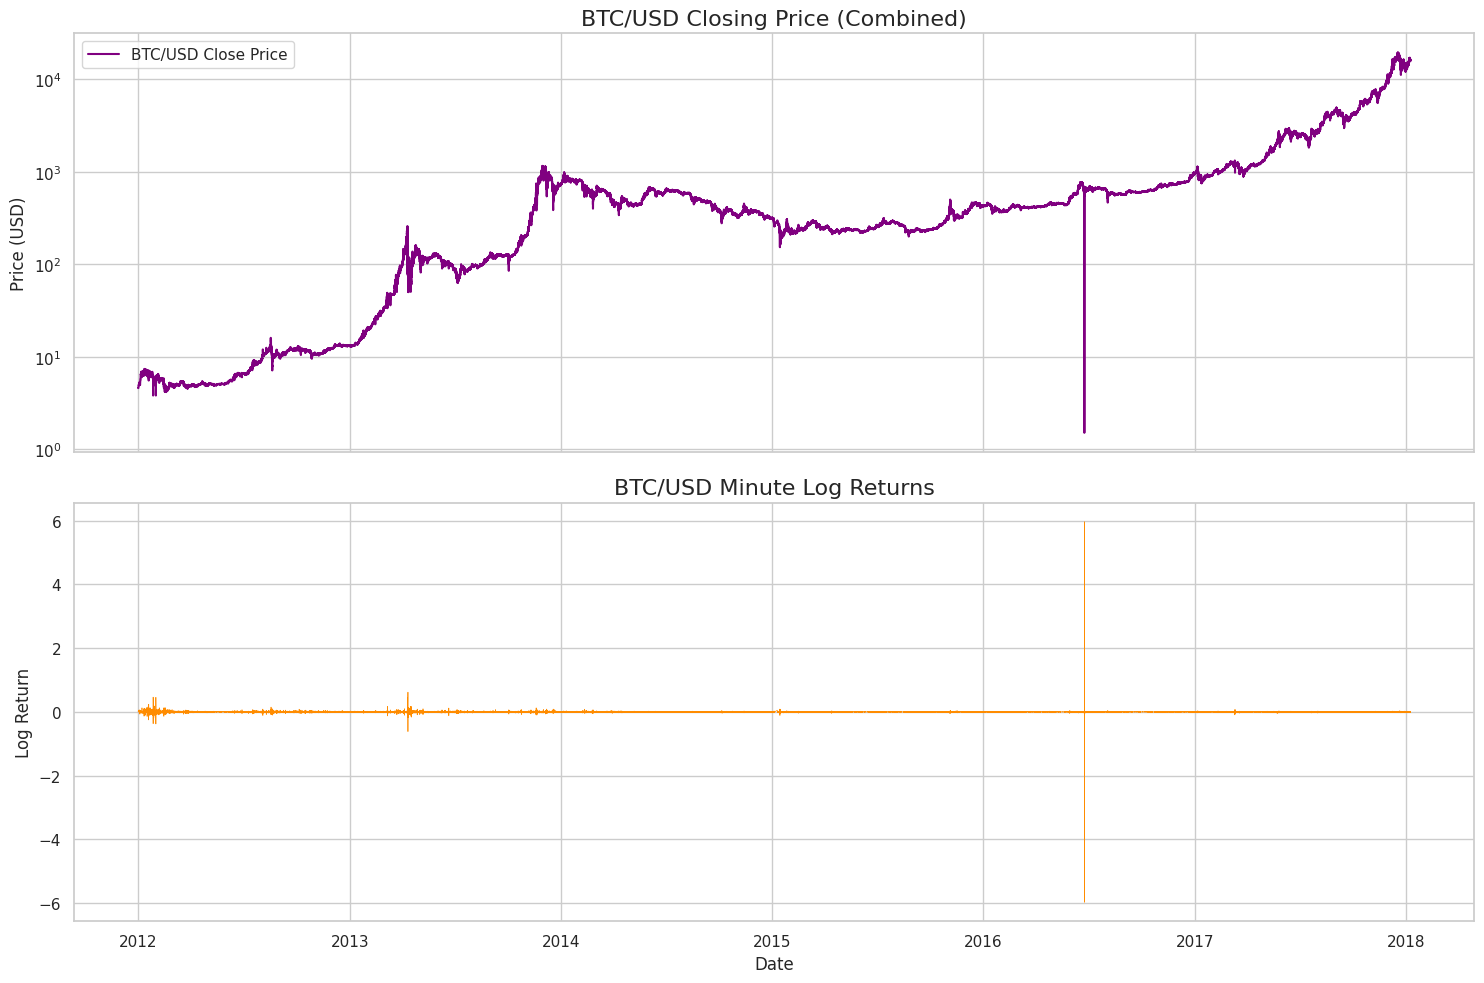

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob # The glob module is perfect for finding files matching a pattern

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

# --- Step 1: Define Path and Find All Yearly CSVs ---
# Based on the inspection output, we now know the correct path
btc_usd_path = 'stock_data/pyfinancialdata/data/cryptocurrencies/bitstamp/BTC_USD'
print(f"--- Looking for data in: {btc_usd_path} ---")

# Use glob to find all files ending with .csv in the directory
csv_files = glob.glob(os.path.join(btc_usd_path, '*.csv'))
csv_files.sort() # Sort the files to ensure they are loaded in chronological order

if not csv_files:
    print(f"!!! ERROR: No CSV files found in {btc_usd_path}. Please check the path.")
    sys.exit()

print(f"Found {len(csv_files)} yearly data files to combine.")

# --- Step 2: Load and Concatenate Data ---
all_btc_dfs = []
print("Loading and combining files...")
for file in csv_files:
    # IMPORTANT: We now use header=0 because the files have a header row.
    df_yearly = pd.read_csv(file, header=0)
    all_btc_dfs.append(df_yearly)

# Combine all the yearly dataframes into one
df = pd.concat(all_btc_dfs, ignore_index=True)
print("All files combined successfully.")

# --- Step 3: Preprocessing the Combined DataFrame ---
print("\n--- Preprocessing combined BTC/USD data ---")

# Convert 'date' column to datetime objects
df['datetime'] = pd.to_datetime(df['date'])

# Set the datetime column as the index
df = df.set_index('datetime')
df = df.drop(columns=['date']) # Drop the original date column

# The 'DtypeWarning' from the inspector suggests some columns might be objects.
# Let's convert OHLC columns to numeric types, coercing errors to NaN.
for col in ['open', 'high', 'low', 'close']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Sort the dataframe by the new index just in case
df.sort_index(inplace=True)

# Drop any rows that might have NaN values after coercion
df.dropna(inplace=True)

# Calculate Log Returns
df['log_return'] = np.log(df['close']).diff()

# Drop the first row which will have a NaN return
df.dropna(inplace=True)

print("Preprocessing complete.")
print(f"Final DataFrame shape: {df.shape}")


# --- Step 4: Display and Visualize Results ---
print("\n--- Final BTC/USD DataFrame Info ---")
print(df.info())
print("\n--- First 5 Rows ---")
print(df.head())
print("\n--- Last 5 Rows ---")
print(df.tail())


# Plotting
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15, 10))
axes[0].plot(df.index, df['close'], label='BTC/USD Close Price', color='purple')
axes[0].set_title('BTC/USD Closing Price (Combined)', fontsize=16)
axes[0].set_ylabel('Price (USD)')
axes[0].set_yscale('log') # Use a log scale for better visualization of crypto prices
axes[0].legend()

axes[1].plot(df.index, df['log_return'], color='darkorange', linewidth=0.5)
axes[1].set_title('BTC/USD Minute Log Returns', fontsize=16)
axes[1].set_ylabel('Log Return')
axes[1].set_xlabel('Date')

plt.tight_layout()
plt.show()



--- Starting Feature Engineering ---
Calculating daily realized volatility...
Daily realized volatility calculated.

Identifying jumps...
Jump identification complete. Total jumps found: 26258

--- Daily Features DataFrame ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2197 entries, 2012-01-01 to 2018-01-08
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   realized_volatility  2197 non-null   float64
 1   annualized_vol       2197 non-null   float64
 2   num_jumps            2197 non-null   int64  
 3   close                2197 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 85.8 KB
None
            realized_volatility  annualized_vol  num_jumps  close
datetime                                                         
2012-01-01             0.004107      122.428956          2   5.00
2012-01-02             0.000000        0.000000          0   5.00
2012-01-03             0.0072

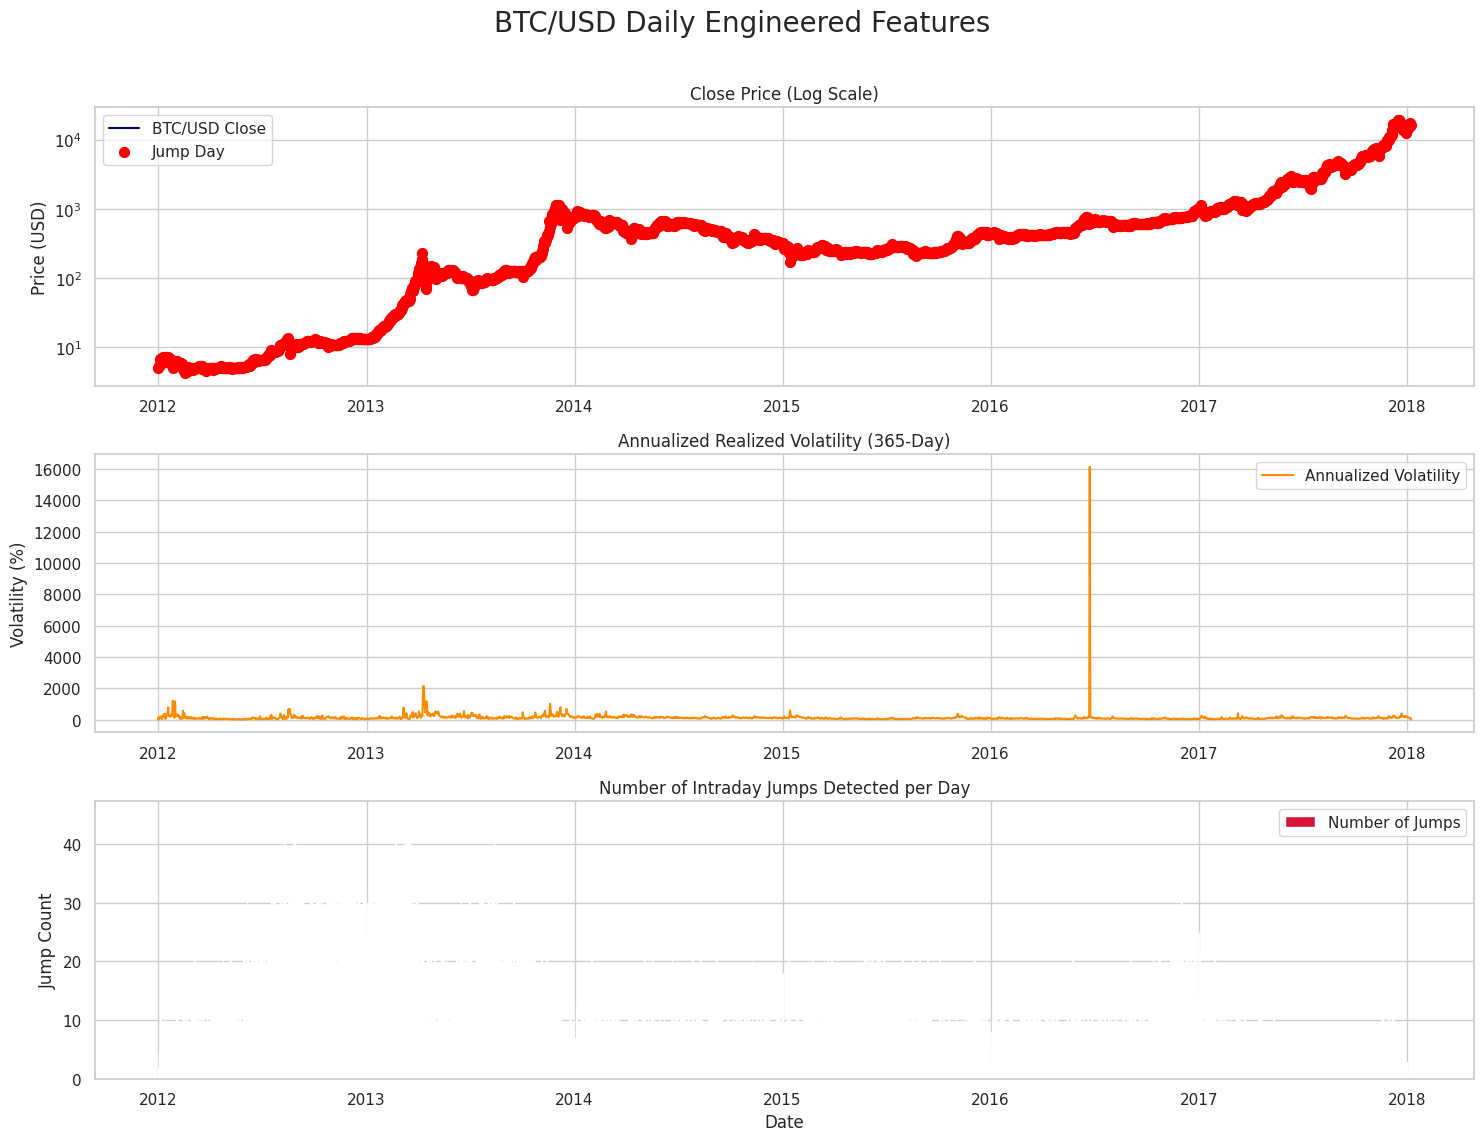

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We assume 'df' from the previous cell is in memory.
# If not, you would need to re-run the previous cell.

print("--- Starting Feature Engineering ---")

# --- Step 1: Calculate Daily Realized Volatility (RV) ---
# RV is the sum of squared log returns over a period (e.g., a day).
print("Calculating daily realized volatility...")
df['sq_log_return'] = np.square(df['log_return'])

# Resample to daily frequency by summing the squared returns
daily_rv = df['sq_log_return'].resample('D').sum()

# It's common to annualize volatility for interpretation. For crypto (24/7), we use 365 days.
# Annualized Volatility = sqrt(Daily RV * 365)
daily_features = pd.DataFrame(daily_rv)
daily_features.rename(columns={'sq_log_return': 'realized_volatility'}, inplace=True)
daily_features['annualized_vol'] = np.sqrt(daily_features['realized_volatility'] * 365) * 100 # In percent

print("Daily realized volatility calculated.")


# --- Step 2: Identify Jumps using a Simple Threshold Method ---
# A common heuristic is to define a jump as any return that exceeds N times the recent local standard deviation.
print("\nIdentifying jumps...")

# Calculate rolling standard deviation over a 1-hour window (60 minutes)
df['rolling_std'] = df['log_return'].rolling(window=60).std()

# Define the jump threshold. 4 standard deviations is a common choice.
jump_threshold = 4 * df['rolling_std']

# A jump is a return whose absolute value exceeds this threshold
df['is_jump'] = np.abs(df['log_return']) > jump_threshold

# Count the number of jumps per day
daily_jumps = df['is_jump'].resample('D').sum()
daily_features['num_jumps'] = daily_jumps

print(f"Jump identification complete. Total jumps found: {int(daily_jumps.sum())}")


# --- Step 3: Finalize and Inspect the Daily Feature Set ---
# Also, add the daily close price to our new dataframe for plotting
daily_features['close'] = df['close'].resample('D').last()
daily_features.dropna(inplace=True)

print("\n--- Daily Features DataFrame ---")
print(daily_features.info())
print(daily_features.head())


# --- Step 4: Visualize the Engineered Features ---
print("\n--- Generating Feature Plots ---")

fig = plt.figure(figsize=(15, 12))
plt.suptitle('BTC/USD Daily Engineered Features', fontsize=20)

# Plot 1: Close Price with Jumps Overlaid
ax1 = plt.subplot(3, 1, 1)
ax1.plot(daily_features.index, daily_features['close'], label='BTC/USD Close', color='navy')
ax1.set_ylabel('Price (USD)')
ax1.set_title('Close Price (Log Scale)')
ax1.set_yscale('log')
# Overlay jumps
jump_days = daily_features[daily_features['num_jumps'] > 0]
ax1.scatter(jump_days.index, jump_days['close'], color='red', s=50, zorder=5, label='Jump Day')
ax1.legend()
ax1.grid(True)


# Plot 2: Annualized Realized Volatility
ax2 = plt.subplot(3, 1, 2, sharex=ax1)
ax2.plot(daily_features.index, daily_features['annualized_vol'], label='Annualized Volatility', color='darkorange')
ax2.set_ylabel('Volatility (%)')
ax2.set_title('Annualized Realized Volatility (365-Day)')
ax2.legend()
ax2.grid(True)

# Plot 3: Number of Jumps Per Day
ax3 = plt.subplot(3, 1, 3, sharex=ax1)
ax3.bar(daily_features.index, daily_features['num_jumps'], label='Number of Jumps', color='crimson', width=1.0)
ax3.set_ylabel('Jump Count')
ax3.set_title('Number of Intraday Jumps Detected per Day')
ax3.set_xlabel('Date')
ax3.legend()
ax3.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout to make room for suptitle
plt.show()

--- FINAL REVISION: Log Transforming Volatility and Using RobustScaler ---
Applied log transformation to realized volatility.

Data split into sets:
 - Training set shape:   (1537, 2)
 - Validation set shape: (329, 2)
 - Test set shape:       (331, 2)

Data (including log-volatility) scaled successfully using RobustScaler.

Sequences created with a length of 30 days.

--- Final Data Shapes for the Model ---
X_train shape: (1507, 30, 2)
y_train shape: (1507, 2)


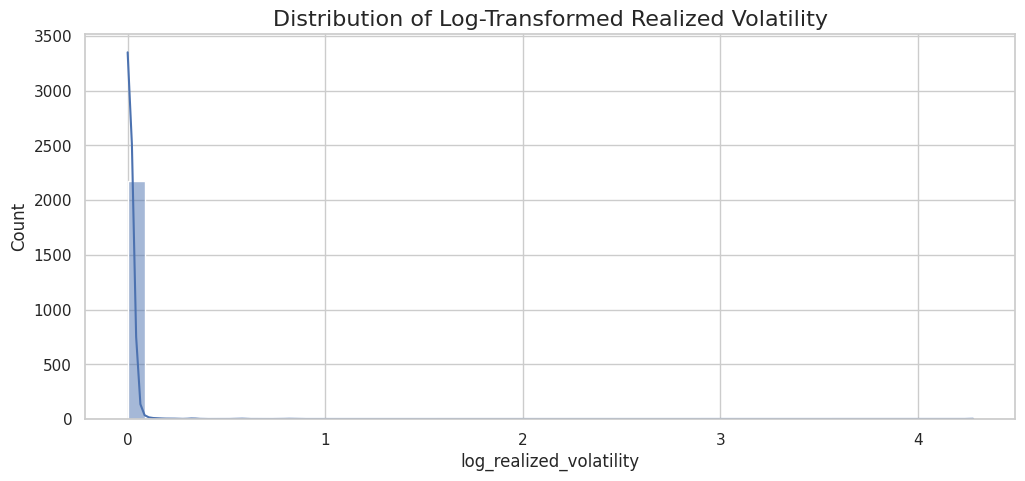

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# We assume 'daily_features' from the previous cell is in memory.

print("--- FINAL REVISION: Log Transforming Volatility and Using RobustScaler ---")

# --- Step 1: Log Transform the Volatility Feature ---
# This is the key step to handle the extreme regime shift in the data.
# We use np.log1p which calculates log(1+x) for numerical stability.
daily_features['log_realized_volatility'] = np.log1p(daily_features['realized_volatility'])

print("Applied log transformation to realized volatility.")

# --- Step 2: Select Features and Split Data ---
# Note: We now use the log-transformed volatility.
features_to_use = ['log_realized_volatility', 'num_jumps']
data_for_model = daily_features[features_to_use]

train_size = int(len(data_for_model) * 0.70)
val_size = int(len(data_for_model) * 0.15)
train_data = data_for_model.iloc[:train_size]
val_data = data_for_model.iloc[train_size:train_size + val_size]
test_data = data_for_model.iloc[train_size + val_size:]

print(f"\nData split into sets:")
print(f" - Training set shape:   {train_data.shape}")
print(f" - Validation set shape: {val_data.shape}")
print(f" - Test set shape:       {test_data.shape}")

# --- Step 3: Scale the Data using RobustScaler ---
scaler = RobustScaler()
train_scaled = scaler.fit_transform(train_data)
val_scaled = scaler.transform(val_data)
test_scaled = scaler.transform(test_data)

print("\nData (including log-volatility) scaled successfully using RobustScaler.")


# --- Step 4: Create and Apply Sequencing Function ---
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

SEQUENCE_LENGTH = 30
X_train, y_train = create_sequences(train_scaled, SEQUENCE_LENGTH)
X_val, y_val = create_sequences(val_scaled, SEQUENCE_LENGTH)
X_test, y_test = create_sequences(test_scaled, SEQUENCE_LENGTH)

print(f"\nSequences created with a length of {SEQUENCE_LENGTH} days.")
print("\n--- Final Data Shapes for the Model ---")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Visualize the new distribution
plt.figure(figsize=(12, 5))
sns.histplot(data_for_model['log_realized_volatility'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Realized Volatility', fontsize=16)
plt.show()

In [15]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# --- We assume X_train, y_train, etc. from the previous cell are in memory ---

# --- Step 1: Set up Device and Convert Data to Tensors ---
print("--- Setting up PyTorch environment ---")

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Convert numpy arrays to PyTorch tensors and move to the selected device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

print("\nData successfully converted to PyTorch Tensors.")


# --- Step 2: Create PyTorch DataLoaders ---
BATCH_SIZE = 64

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
# Shuffle training data to ensure model doesn't learn the order of batches
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
# No need to shuffle validation or test data
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"DataLoaders created with a batch size of {BATCH_SIZE}.")


# --- Step 3: Define the LSTM Model Architecture ---
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layer: processes input sequences
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)
        
        # Dropout layer for regularization
        self.dropout = nn.Dropout(dropout_prob)
        
        # Fully connected layer to map LSTM output to our desired output shape
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Pass input through LSTM layer
        # lstm_out shape: (batch_size, sequence_length, hidden_size)
        lstm_out, _ = self.lstm(x, (h0, c0))
        
        # We only need the output from the last time step
        last_time_step_out = lstm_out[:, -1, :]
        
        # Apply dropout
        out = self.dropout(last_time_step_out)
        
        # Pass through the fully connected layer
        out = self.fc(out)
        
        return out

print("\nLSTM model class defined.")

# --- Step 4: Instantiate the Model ---
# Hyperparameters
INPUT_SIZE = X_train.shape[2]  # Number of features (2: RV and Jumps)
HIDDEN_SIZE = 64              # Number of neurons in the hidden layer
NUM_LAYERS = 2                # Number of stacked LSTM layers
OUTPUT_SIZE = y_train.shape[1] # Number of output features (2)
DROPOUT_PROB = 0.2            # Dropout probability

# Create an instance of the model
model = LSTMModel(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE, DROPOUT_PROB).to(device)

print("\n--- Model Architecture ---")
print(model)

# --- Optional: Print number of trainable parameters ---
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal trainable parameters: {total_params:,}")

print("\nModel is built and ready for training.")

--- Setting up PyTorch environment ---
Using device: cuda

Data successfully converted to PyTorch Tensors.
DataLoaders created with a batch size of 64.

LSTM model class defined.

--- Model Architecture ---
LSTMModel(
  (lstm): LSTM(2, 64, num_layers=2, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=64, out_features=2, bias=True)
)

Total trainable parameters: 50,818

Model is built and ready for training.


--- Preparing for Training ---
Optimizer: Adam with learning rate 0.001
Loss Function: Mean Squared Error (MSE)

Starting training for a maximum of 100 epochs with patience of 10 for early stopping...
Epoch 001/100 | Train Loss: 17.056036 | Val Loss: 761.863756
  -> Validation loss improved. Saving model state.
Epoch 002/100 | Train Loss: 15.898060 | Val Loss: 762.875947
Epoch 003/100 | Train Loss: 15.070711 | Val Loss: 762.873767
Epoch 004/100 | Train Loss: 15.098478 | Val Loss: 762.759678
Epoch 005/100 | Train Loss: 17.262576 | Val Loss: 762.788381
Epoch 006/100 | Train Loss: 14.818346 | Val Loss: 762.720335
Epoch 007/100 | Train Loss: 14.674914 | Val Loss: 762.568091
Epoch 008/100 | Train Loss: 14.445932 | Val Loss: 762.524193
Epoch 009/100 | Train Loss: 14.425064 | Val Loss: 762.413637
Epoch 010/100 | Train Loss: 14.336848 | Val Loss: 762.464615
Epoch 011/100 | Train Loss: 14.178575 | Val Loss: 762.217597

Early stopping triggered after 10 epochs with no improvement.

--- Training 

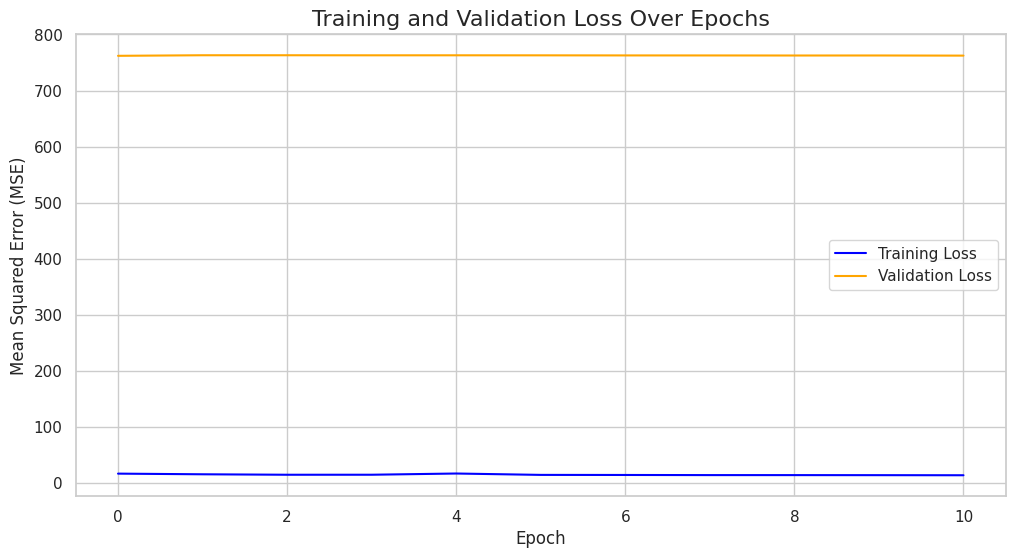

In [16]:
import torch
import torch.nn as nn
import numpy as np
import time

# We assume 'model', 'train_loader', 'val_loader', etc. from the previous cell are in memory.

# --- Step 1: Define Loss Function and Optimizer ---
LEARNING_RATE = 0.001
# Mean Squared Error is a good choice for this regression problem
loss_function = nn.MSELoss()
# Adam is a robust and widely used optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

print("--- Preparing for Training ---")
print(f"Optimizer: Adam with learning rate {LEARNING_RATE}")
print(f"Loss Function: Mean Squared Error (MSE)")


# --- Step 2: Set up Training Loop with Early Stopping ---
NUM_EPOCHS = 100  # Maximum number of epochs to train for
# Early stopping parameters
patience = 10  # How many epochs to wait for improvement before stopping
best_val_loss = float('inf')
epochs_no_improve = 0
best_model_state = None

# Lists to store loss history for plotting
train_losses = []
val_losses = []

print(f"\nStarting training for a maximum of {NUM_EPOCHS} epochs with patience of {patience} for early stopping...")
start_time = time.time()

for epoch in range(NUM_EPOCHS):
    
    # --- Training Phase ---
    model.train()  # Set the model to training mode
    batch_train_losses = []
    for X_batch, y_batch in train_loader:
        # X_batch and y_batch are already on the correct device from the DataLoader setup
        
        # Forward pass
        y_pred = model(X_batch)
        loss = loss_function(y_pred, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update weights
        
        batch_train_losses.append(loss.item())
        
    epoch_train_loss = np.mean(batch_train_losses)
    train_losses.append(epoch_train_loss)
    
    # --- Validation Phase ---
    model.eval()  # Set the model to evaluation mode
    batch_val_losses = []
    with torch.no_grad():  # No need to track gradients during validation
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            loss = loss_function(y_pred, y_batch)
            batch_val_losses.append(loss.item())
            
    epoch_val_loss = np.mean(batch_val_losses)
    val_losses.append(epoch_val_loss)
    
    # Print progress
    print(f"Epoch {epoch+1:03}/{NUM_EPOCHS} | Train Loss: {epoch_train_loss:.6f} | Val Loss: {epoch_val_loss:.6f}")
    
    # --- Early Stopping Logic ---
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_no_improve = 0
        # Save the best model state
        best_model_state = model.state_dict()
        print(f"  -> Validation loss improved. Saving model state.")
    else:
        epochs_no_improve += 1
        
    if epochs_no_improve == patience:
        print(f"\nEarly stopping triggered after {patience} epochs with no improvement.")
        break

# --- Post-Training ---
end_time = time.time()
training_time = end_time - start_time
print(f"\n--- Training Complete ---")
print(f"Total training time: {training_time:.2f} seconds")

# Load the best model state found during training
if best_model_state:
    model.load_state_dict(best_model_state)
    print("Best model state loaded for evaluation.")


# --- Plotting the Loss Curves ---
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

--- Starting Final Evaluation on the Test Set ---
Predictions generated for the entire test set.
Predictions and actuals have been inverse-transformed to their original scale.

--- Visualizing Predictions vs. Actuals ---


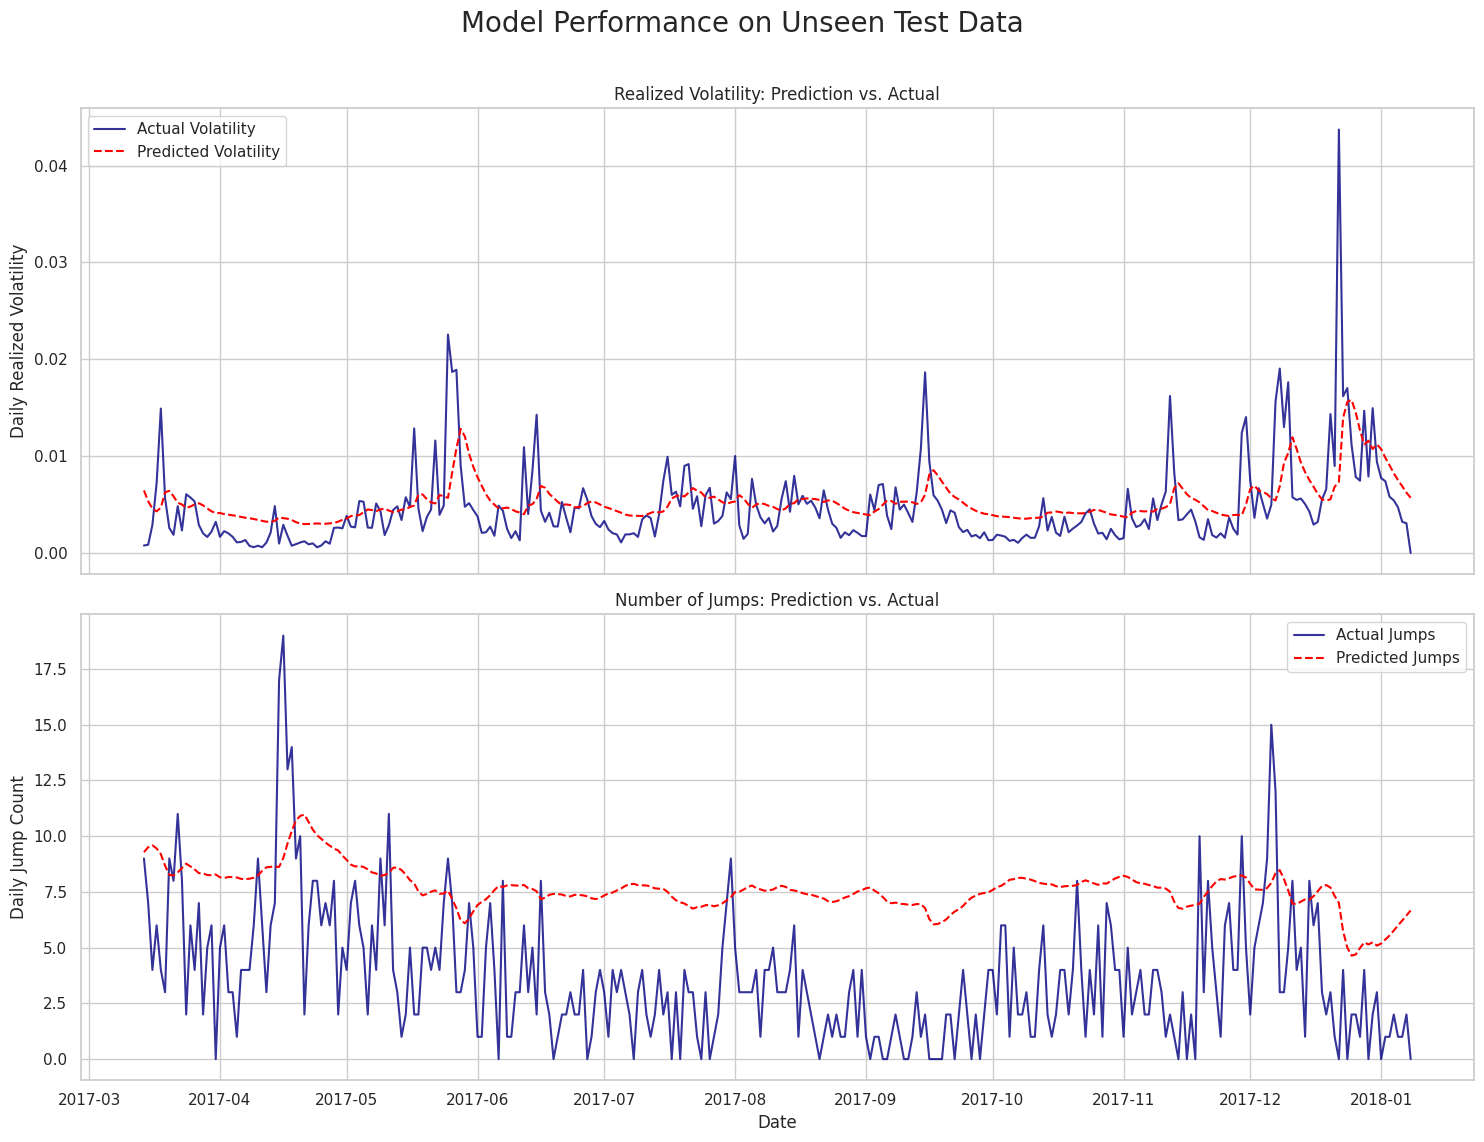


--- Final Performance Metrics (on original scale) ---
Volatility - Mean Squared Error (MSE): 0.000015
Volatility - Mean Absolute Error (MAE): 0.002627

Jumps - Mean Squared Error (MSE): 22.86
Jumps - Mean Absolute Error (MAE): 4.34


In [17]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# We assume the trained 'model', 'test_loader', 'scaler', and 'X_test', 'y_test' are in memory.

print("--- Starting Final Evaluation on the Test Set ---")

# --- Step 1: Make Predictions on the Test Data ---
model.eval()  # Set the model to evaluation mode
test_predictions_list = []

with torch.no_grad():
    for X_batch, _ in test_loader: # We don't need y_batch here
        y_pred = model(X_batch)
        test_predictions_list.append(y_pred.cpu().numpy())

# Concatenate predictions from all batches
predictions_scaled = np.concatenate(test_predictions_list, axis=0)

print("Predictions generated for the entire test set.")


# --- Step 2: Inverse Transform Predictions and Actuals ---
# Important: The scaler was fit on two columns. We must apply the inverse transform
# before separating the features.

# Inverse scale the predictions
predictions_unscaled = scaler.inverse_transform(predictions_scaled)

# Inverse scale the actual values for comparison
actuals_unscaled = scaler.inverse_transform(y_test[:len(predictions_unscaled)])

# Now, inverse the log-transform for volatility (the first column, index 0)
# Use np.expm1 which calculates exp(x) - 1, the inverse of np.log1p
predicted_rv = np.expm1(predictions_unscaled[:, 0])
actual_rv = np.expm1(actuals_unscaled[:, 0])

# The jumps (the second column, index 1) were not log-transformed
predicted_jumps = predictions_unscaled[:, 1]
actual_jumps = actuals_unscaled[:, 1]

print("Predictions and actuals have been inverse-transformed to their original scale.")


# --- Step 3: Create a Results DataFrame for easier plotting ---
results_df = pd.DataFrame({
    'Actual Volatility': actual_rv,
    'Predicted Volatility': predicted_rv,
    'Actual Jumps': actual_jumps,
    'Predicted Jumps': predicted_jumps
}, index=daily_features.index[-len(actual_rv):]) # Use the correct dates from the original df


# --- Step 4: Visualize the Results ---
print("\n--- Visualizing Predictions vs. Actuals ---")
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)
plt.suptitle('Model Performance on Unseen Test Data', fontsize=20)

# Plot 1: Realized Volatility
axes[0].plot(results_df.index, results_df['Actual Volatility'], label='Actual Volatility', color='navy', alpha=0.8)
axes[0].plot(results_df.index, results_df['Predicted Volatility'], label='Predicted Volatility', color='red', linestyle='--')
axes[0].set_title('Realized Volatility: Prediction vs. Actual')
axes[0].set_ylabel('Daily Realized Volatility')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Number of Jumps
axes[1].plot(results_df.index, results_df['Actual Jumps'], label='Actual Jumps', color='navy', alpha=0.8)
axes[1].plot(results_df.index, results_df['Predicted Jumps'], label='Predicted Jumps', color='red', linestyle='--')
axes[1].set_title('Number of Jumps: Prediction vs. Actual')
axes[1].set_ylabel('Daily Jump Count')
axes[1].set_xlabel('Date')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


# --- Step 5: Calculate and Print Final Error Metrics ---
print("\n--- Final Performance Metrics (on original scale) ---")

# Volatility Metrics
rv_mse = mean_squared_error(results_df['Actual Volatility'], results_df['Predicted Volatility'])
rv_mae = mean_absolute_error(results_df['Actual Volatility'], results_df['Predicted Volatility'])
print(f"Volatility - Mean Squared Error (MSE): {rv_mse:.6f}")
print(f"Volatility - Mean Absolute Error (MAE): {rv_mae:.6f}")

# Jump Metrics
jump_mse = mean_squared_error(results_df['Actual Jumps'], results_df['Predicted Jumps'])
jump_mae = mean_absolute_error(results_df['Actual Jumps'], results_df['Predicted Jumps'])
print(f"\nJumps - Mean Squared Error (MSE): {jump_mse:.2f}")
print(f"Jumps - Mean Absolute Error (MAE): {jump_mae:.2f}")

In [21]:
import os

# Define the root directory where your data was unzipped
root_directory = 'stock_data'

print("=" * 80)
print(f"CONCISE DIRECTORY SUMMARY FOR: '{root_directory}'")
print("This lists only the directories that contain data files.")
print("=" * 80)

# A set to store the paths of directories that contain data files
data_directories = set()

# Check if the root directory exists
if not os.path.isdir(root_directory):
    print(f"\n!!! ERROR: The directory '{root_directory}' was not found.")
    print("!!! Please make sure you have successfully run the first setup cell.")
else:
    for dirpath, dirnames, filenames in os.walk(root_directory):
        # Check if there are any .csv or .txt files in the current directory
        data_files = [f for f in filenames if f.lower().endswith(('.csv', '.txt'))]
        
        if data_files:
            # If data files are found, add the path to our set and also report the count
            # Using relpath to make the output cleaner and relative to the start
            relative_path = os.path.relpath(dirpath, '.')
            data_directories.add(f"{relative_path} ({len(data_files)} files)")

# Print the sorted list of unique directories containing data
if data_directories:
    print("Found data in the following locations:\n")
    for path_info in sorted(list(data_directories)):
        print(path_info)
else:
    print("No data directories with .csv or .txt files were found.")


print("\n" + "=" * 80)
print("SUMMARY COMPLETE.")
print("Please copy the output above and paste it in the chat.")
print("=" * 80)

CONCISE DIRECTORY SUMMARY FOR: 'stock_data'
This lists only the directories that contain data files.
Found data in the following locations:

stock_data (1 files)
stock_data/pyfinancialdata/data/cryptocurrencies/bitstamp/BTC_USD (7 files)
stock_data/pyfinancialdata/data/cryptocurrencies/kraken/BTC_EUR (1 files)
stock_data/pyfinancialdata/data/cryptocurrencies/kraken/ETH_EUR (1 files)
stock_data/pyfinancialdata/data/currencies/oanda/AU200_AUD/2005 (12 files)
stock_data/pyfinancialdata/data/currencies/oanda/AU200_AUD/2006 (12 files)
stock_data/pyfinancialdata/data/currencies/oanda/AU200_AUD/2007 (12 files)
stock_data/pyfinancialdata/data/currencies/oanda/AU200_AUD/2008 (12 files)
stock_data/pyfinancialdata/data/currencies/oanda/AU200_AUD/2009 (12 files)
stock_data/pyfinancialdata/data/currencies/oanda/AU200_AUD/2010 (12 files)
stock_data/pyfinancialdata/data/currencies/oanda/AU200_AUD/2011 (12 files)
stock_data/pyfinancialdata/data/currencies/oanda/AU200_AUD/2012 (12 files)
stock_data/pyf

In [25]:
import os
import glob
import csv

# Define the paths we want to inspect
paths_to_inspect = {
    'btc': 'stock_data/pyfinancialdata/data/cryptocurrencies/bitstamp/BTC_USD',
    'eurusd': 'stock_data/pyfinancialdata/data/currencies/oanda/EUR_USD',
    'spx': 'stock_data/pyfinancialdata/data/stocks/histdata/SPXUSD'
}

print("=" * 80)
print("             STARTING RAW FILE ATTRIBUTE INSPECTION")
print("=" * 80)

# Loop through each asset path
for symbol, path in paths_to_inspect.items():
    print(f"\n--- Profiling Asset: '{symbol}' in path: '{path}' ---")
    
    # Find one sample CSV file to inspect
    sample_files = glob.glob(os.path.join(path, '**', '*.csv'), recursive=True)
    if not sample_files:
        print("  !!! ERROR: No .csv files found in this directory. Please check the path.")
        continue
        
    sample_file_path = sample_files[0]
    print(f"  - Inspecting sample file: {sample_file_path}")
    
    try:
        # Open the file in text mode to inspect its raw content
        with open(sample_file_path, 'r') as f:
            
            # --- 1. Detect Delimiter ---
            # Use Python's built-in sniffer to reliably detect the delimiter
            sniffer = csv.Sniffer()
            first_few_lines = f.read(2048) # Read a sample of the file
            dialect = sniffer.sniff(first_few_lines)
            print(f"  - Detected Delimiter: '{dialect.delimiter}'")
            
            # --- 2. Show Raw Header and First 5 Lines ---
            f.seek(0) # Rewind the file to the beginning
            print("  - First 5 raw lines of the file:")
            for i, line in enumerate(f):
                if i < 5:
                    # repr() is used to clearly show hidden characters like spaces or tabs
                    print(f"    Line {i+1}: {repr(line.strip())}")
                else:
                    break

    except Exception as e:
        print(f"  !!! ERROR during inspection: {e}")

print("\n" + "=" * 80)
print("INSPECTION COMPLETE. Please copy the entire output above this line.")
print("=" * 80)

             STARTING RAW FILE ATTRIBUTE INSPECTION

--- Profiling Asset: 'btc' in path: 'stock_data/pyfinancialdata/data/cryptocurrencies/bitstamp/BTC_USD' ---
  - Inspecting sample file: stock_data/pyfinancialdata/data/cryptocurrencies/bitstamp/BTC_USD/2017.csv
  - Detected Delimiter: ','
  - First 5 raw lines of the file:
    Line 1: 'date,open,high,low,close'
    Line 2: '2017-01-01 00:00:00,966.2,966.3,966.2,966.3'
    Line 3: '2017-01-01 00:01:00,966.34,966.34,966.34,966.34'
    Line 4: '2017-01-01 00:02:00,966.16,966.37,966.16,966.37'
    Line 5: '2017-01-01 00:03:00,966.16,966.37,966.16,966.37'

--- Profiling Asset: 'eurusd' in path: 'stock_data/pyfinancialdata/data/currencies/oanda/EUR_USD' ---
  - Inspecting sample file: stock_data/pyfinancialdata/data/currencies/oanda/EUR_USD/2012/oanda-EUR_USD-2012-2.csv
  - Detected Delimiter: ','
  - First 5 raw lines of the file:
    Line 1: 'time,close,high,low,open,volume'
    Line 2: '2012-02-01 00:01:00,1.30746,1.30773,1.30726,1.3076

In [32]:
import pandas as pd
import numpy as np
import glob
import os

def process_asset(base_path, symbol, header_row, delimiter, column_names=None, datetime_format=None):
    """
    Loads, combines, and preprocesses all data for a single asset based on its specific, true format.
    """
    print(f"--- Processing {symbol} ---")
    
    csv_files = glob.glob(os.path.join(base_path, '**', '*.csv'), recursive=True)
    if not csv_files:
        print(f"!!! No CSV files found for {symbol}")
        return None
    
    df_list = [pd.read_csv(f, header=header_row, delimiter=delimiter, names=column_names) for f in csv_files]
    df = pd.concat(df_list, ignore_index=True)
    
    df.columns = [str(col).strip().lower() for col in df.columns]
    
    # --- DateTime Parsing ---
    # Use the first column that contains 'date' or 'time' as the source
    date_col_name = next((col for col in df.columns if 'date' in col or 'time' in col), df.columns[0])
    df['datetime'] = pd.to_datetime(df[date_col_name], format=datetime_format, errors='coerce')
    
    # *** FINAL FIX 1: Standardize all indexes to be timezone-NAIVE ***
    # This guarantees they can be combined.
    df['datetime'] = df['datetime'].dt.tz_localize(None)
    
    df.dropna(subset=['datetime'], inplace=True)
    df = df.set_index('datetime').sort_index()

    # --- Data Cleaning ---
    for col in ['open', 'high', 'low', 'close']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # --- Resample to Daily Features ---
    daily_close = df['close'].resample('D').last()
    daily_log_return = np.log(daily_close).diff()

    df['log_return'] = np.log(df['close']).diff()
    daily_realized_vol = df['log_return'].resample('D').apply(lambda x: (x**2).sum())
    
    daily_df = pd.DataFrame({
        f'{symbol}_ret': daily_log_return,
        f'{symbol}_rv': daily_realized_vol
    })
    
    print(f"Processing for {symbol} complete.")
    return daily_df

# --- Define Paths and Asset-Specific Configurations based on our final diagnosis ---
paths = {
    'btc': 'stock_data/pyfinancialdata/data/cryptocurrencies/bitstamp/BTC_USD',
    'eurusd': 'stock_data/pyfinancialdata/data/currencies/oanda/EUR_USD',
    'spx': 'stock_data/pyfinancialdata/data/stocks/histdata/SPXUSD'
}

# *** FINAL FIX 2: Correct column names and datetime format for Histdata ***
histdata_columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']
histdata_dt_format = '%Y%m%d %H%M%S'

asset_configs = {
    'btc':    {'base_path': paths['btc'], 'symbol': 'btc', 'header_row': 0, 'delimiter': ','},
    'eurusd': {'base_path': paths['eurusd'], 'symbol': 'eurusd', 'header_row': 0, 'delimiter': ','},
    'spx':    {'base_path': paths['spx'], 'symbol': 'spx', 'header_row': None, 'delimiter': ';', 'column_names': histdata_columns, 'datetime_format': histdata_dt_format}
}

# --- Process Each Asset ---
df_btc = process_asset(**asset_configs['btc'])
df_eurusd = process_asset(**asset_configs['eurusd'])
df_spx = process_asset(**asset_configs['spx'])

# --- Combine into a single Master DataFrame ---
print("\n--- Combining all assets into a master DataFrame ---")
if all(df is not None for df in [df_btc, df_eurusd, df_spx]):
    master_df = pd.concat([df_btc, df_eurusd, df_spx], axis=1)

    print("Forward-filling missing values for non-trading days...")
    master_df.ffill(inplace=True)
    master_df.dropna(inplace=True)

    # Define a common date range
    master_df = master_df.loc['2012-01-01':'2018-01-01']

    print("\n--- Master Cross-Asset DataFrame ---")
    if not master_df.empty:
        print(master_df.info())
        print("\n--- First 5 Rows ---")
        print(master_df.head())
        print("\n--- Last 5 Rows ---")
        print(master_df.tail())
    else:
        print("Master DataFrame is empty after processing. The date ranges may not overlap.")
else:
    print("One or more assets failed to process. Cannot create master DataFrame.")

--- Processing btc ---
Processing for btc complete.
--- Processing eurusd ---
Processing for eurusd complete.
--- Processing spx ---
Processing for spx complete.

--- Combining all assets into a master DataFrame ---
Forward-filling missing values for non-trading days...

--- Master Cross-Asset DataFrame ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2012-01-02 to 2018-01-01
Freq: D
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   btc_ret     2192 non-null   float64
 1   btc_rv      2192 non-null   float64
 2   eurusd_ret  2192 non-null   float64
 3   eurusd_rv   2192 non-null   float64
 4   spx_ret     2192 non-null   float64
 5   spx_rv      2192 non-null   float64
dtypes: float64(6)
memory usage: 119.9 KB
None

--- First 5 Rows ---
             btc_ret    btc_rv  eurusd_ret  eurusd_rv   spx_ret    spx_rv
datetime                                                                 
2012-01-02  0.

--- Starting Cross-Asset Feature Engineering ---
Calculating 30-day rolling correlations...
Calculating 30-day rolling Beta of BTC vs. SPX...
Creating lagged volatility spillover features...
Log-transforming all volatility features...

--- Master DataFrame with New Cross-Asset Features ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2163 entries, 2012-01-31 to 2018-01-01
Freq: D
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   btc_ret             2163 non-null   float64
 1   btc_rv              2163 non-null   float64
 2   eurusd_ret          2163 non-null   float64
 3   eurusd_rv           2163 non-null   float64
 4   spx_ret             2163 non-null   float64
 5   spx_rv              2163 non-null   float64
 6   corr_btc_spx        2163 non-null   float64
 7   corr_btc_eurusd     2163 non-null   float64
 8   beta_btc_vs_spx     2163 non-null   float64
 9   spx_rv_lag1         2163 non-nul

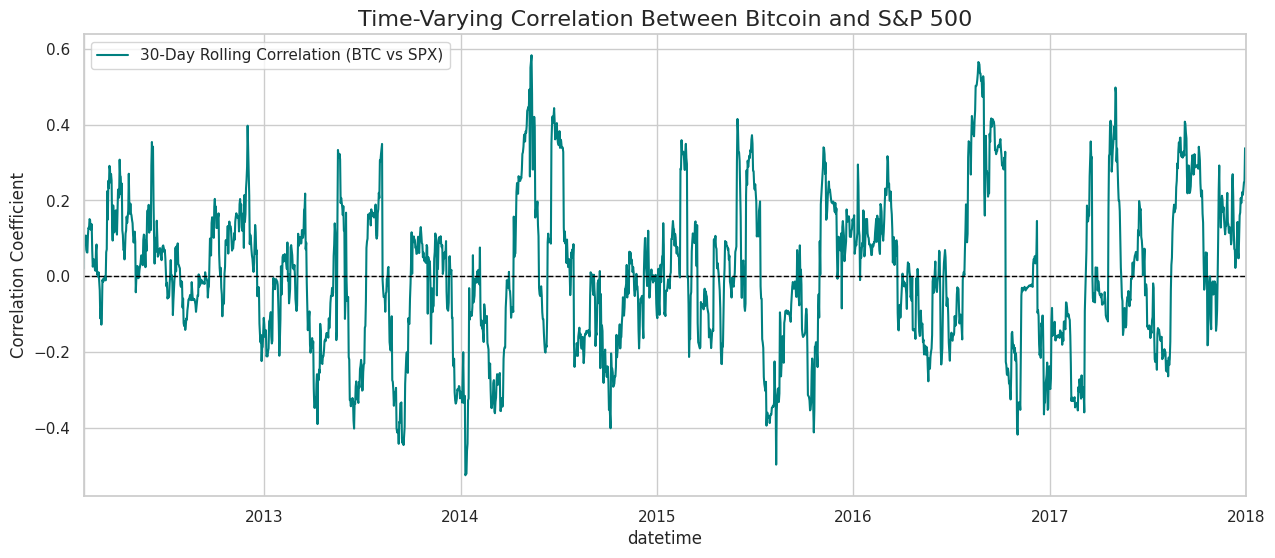

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We assume 'master_df' from the previous cell is in memory.

print("--- Starting Cross-Asset Feature Engineering ---")

# Define a 30-day rolling window for our calculations
WINDOW = 30 

# --- Step 1: Calculate Rolling Correlations ---
# This measures how the relationship between asset returns changes over time.
print(f"Calculating {WINDOW}-day rolling correlations...")
master_df['corr_btc_spx'] = master_df['btc_ret'].rolling(WINDOW).corr(master_df['spx_ret'])
master_df['corr_btc_eurusd'] = master_df['btc_ret'].rolling(WINDOW).corr(master_df['eurusd_ret'])

# --- Step 2: Calculate Rolling Beta ---
# Beta = Cov(asset, market) / Var(market)
# This measures BTC's volatility relative to the SPX (our market proxy).
print(f"Calculating {WINDOW}-day rolling Beta of BTC vs. SPX...")
rolling_cov = master_df['btc_ret'].rolling(WINDOW).cov(master_df['spx_ret'])
rolling_var = master_df['spx_ret'].rolling(WINDOW).var()
master_df['beta_btc_vs_spx'] = rolling_cov / rolling_var

# --- Step 3: Create Lagged Volatility Spillover Features ---
# Does yesterday's SPX volatility help predict today's BTC volatility?
print("Creating lagged volatility spillover features...")
master_df['spx_rv_lag1'] = master_df['spx_rv'].shift(1)
master_df['eurusd_rv_lag1'] = master_df['eurusd_rv'].shift(1)

# --- Step 4: Log-transform all volatility-related features ---
# As we learned, this is crucial for model stability.
print("Log-transforming all volatility features...")
rv_cols = [col for col in master_df.columns if '_rv' in col]
for col in rv_cols:
    master_df[f'log_{col}'] = np.log1p(master_df[col])

# --- Final Cleanup ---
# The rolling window and lags will create NaNs at the beginning. Drop them.
master_df.dropna(inplace=True)

print("\n--- Master DataFrame with New Cross-Asset Features ---")
print(master_df.info())
print("\n--- First 5 Rows ---")
print(master_df.head())
print("\n--- Last 5 Rows ---")
print(master_df.tail())


# --- Visualize a new feature to see what we've created ---
plt.figure(figsize=(15, 6))
master_df['corr_btc_spx'].plot(label='30-Day Rolling Correlation (BTC vs SPX)', color='teal')
plt.title('Time-Varying Correlation Between Bitcoin and S&P 500', fontsize=16)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.ylabel('Correlation Coefficient')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import RobustScaler

# We assume 'master_df' from the previous cell is in memory.

print("--- Preparing Data for Cross-Asset Model ---")

# --- Step 1: Define Features and Targets ---
# Use the new cross-asset features as input for the model.
features_to_use = [
    'log_btc_rv', 'log_eurusd_rv', 'log_spx_rv',         # Current log volatilities
    'corr_btc_spx', 'corr_btc_eurusd', 'beta_btc_vs_spx', # Correlation & Beta features
    'log_spx_rv_lag1', 'log_eurusd_rv_lag1'               # Spillover features
]

# The goal is to predict the next day's volatility for all three assets.
targets_to_predict = ['log_btc_rv', 'log_eurusd_rv', 'log_spx_rv']

X_data = master_df[features_to_use]
y_data = master_df[targets_to_predict]

print(f"Number of input features: {len(features_to_use)}")
print(f"Number of output targets: {len(targets_to_predict)}")

# --- Step 2: Split, Scale, and Sequence Data ---
train_size = int(len(X_data) * 0.70)
val_size = int(len(X_data) * 0.15)

X_train, y_train = X_data.iloc[:train_size], y_data.iloc[:train_size]
X_val, y_val = X_data.iloc[train_size:train_size+val_size], y_data.iloc[train_size:train_size+val_size]
X_test, y_test = X_data.iloc[train_size+val_size:], y_data.iloc[train_size+val_size:]

scaler_X = RobustScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = RobustScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

def create_sequences(X, y, sequence_length):
    Xs, ys = [], []
    for i in range(len(X) - sequence_length):
        Xs.append(X[i:(i + sequence_length)])
        ys.append(y[i + sequence_length])
    return np.array(Xs), np.array(ys)

SEQUENCE_LENGTH = 30
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, SEQUENCE_LENGTH)
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val_scaled, SEQUENCE_LENGTH)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, SEQUENCE_LENGTH)

# --- Step 3: Build and Train the PyTorch Model ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_t = torch.tensor(X_train_seq, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train_seq, dtype=torch.float32).to(device)
X_val_t = torch.tensor(X_val_seq, dtype=torch.float32).to(device)
y_val_t = torch.tensor(y_val_seq, dtype=torch.float32).to(device)
X_test_t = torch.tensor(X_test_seq, dtype=torch.float32).to(device)
y_test_t = torch.tensor(y_test_seq, dtype=torch.float32).to(device)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=64, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=64, shuffle=False)

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        lstm_out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(lstm_out[:, -1, :])
        return self.fc(out)

INPUT_SIZE = X_train_seq.shape[2]
OUTPUT_SIZE = y_train_seq.shape[1]
model = LSTMModel(INPUT_SIZE, hidden_size=128, num_layers=2, output_size=OUTPUT_SIZE, dropout_prob=0.2).to(device)

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print("\n--- Starting Training of Cross-Asset Model ---")
# Training loop with early stopping
NUM_EPOCHS, patience, best_val_loss, epochs_no_improve = 100, 10, float('inf'), 0
train_losses, val_losses = [], []

for epoch in range(NUM_EPOCHS):
    model.train()
    batch_train_losses = []
    for X, y in train_loader:
        y_pred = model(X)
        loss = loss_function(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_train_losses.append(loss.item())
    
    epoch_train_loss = np.mean(batch_train_losses)
    train_losses.append(epoch_train_loss)

    model.eval()
    batch_val_losses = []
    with torch.no_grad():
        for X, y in val_loader:
            y_pred = model(X)
            loss = loss_function(y_pred, y)
            batch_val_losses.append(loss.item())
    
    epoch_val_loss = np.mean(batch_val_losses)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1:02}/{NUM_EPOCHS} | Train Loss: {epoch_train_loss:.4f} | Val Loss: {epoch_val_loss:.4f}")

    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_cross_asset_model.pth')
    else:
        epochs_no_improve += 1
    
    if epochs_no_improve == patience:
        print(f"Early stopping triggered after {patience} epochs.")
        break

print("\n--- Training Complete ---")
# Load the best model for evaluation
model.load_state_dict(torch.load('best_cross_asset_model.pth'))

--- Preparing Data for Cross-Asset Model ---
Number of input features: 8
Number of output targets: 3

--- Starting Training of Cross-Asset Model ---
Epoch 01/100 | Train Loss: 11.8867 | Val Loss: 535.8882
Epoch 02/100 | Train Loss: 11.1076 | Val Loss: 535.6264
Epoch 03/100 | Train Loss: 10.8655 | Val Loss: 535.7246
Epoch 04/100 | Train Loss: 10.6740 | Val Loss: 535.4949
Epoch 05/100 | Train Loss: 10.4991 | Val Loss: 535.5024
Epoch 06/100 | Train Loss: 10.3623 | Val Loss: 535.7188
Epoch 07/100 | Train Loss: 10.2490 | Val Loss: 535.3754
Epoch 08/100 | Train Loss: 9.9318 | Val Loss: 535.4731
Epoch 09/100 | Train Loss: 9.6573 | Val Loss: 536.3201
Epoch 10/100 | Train Loss: 9.3437 | Val Loss: 535.6245
Epoch 11/100 | Train Loss: 9.1196 | Val Loss: 535.6376
Epoch 12/100 | Train Loss: 9.0851 | Val Loss: 535.7678
Epoch 13/100 | Train Loss: 8.8620 | Val Loss: 535.4967
Epoch 14/100 | Train Loss: 8.6089 | Val Loss: 535.8817
Epoch 15/100 | Train Loss: 8.5415 | Val Loss: 535.7263
Epoch 16/100 | Trai

<All keys matched successfully>

--- Starting Final Evaluation on the Test Set for the Cross-Asset Model ---
Predictions generated for the entire test set.
Predictions and actuals have been inverse-transformed to log-volatility scale.

--- Visualizing Predictions vs. Actuals for Each Asset ---


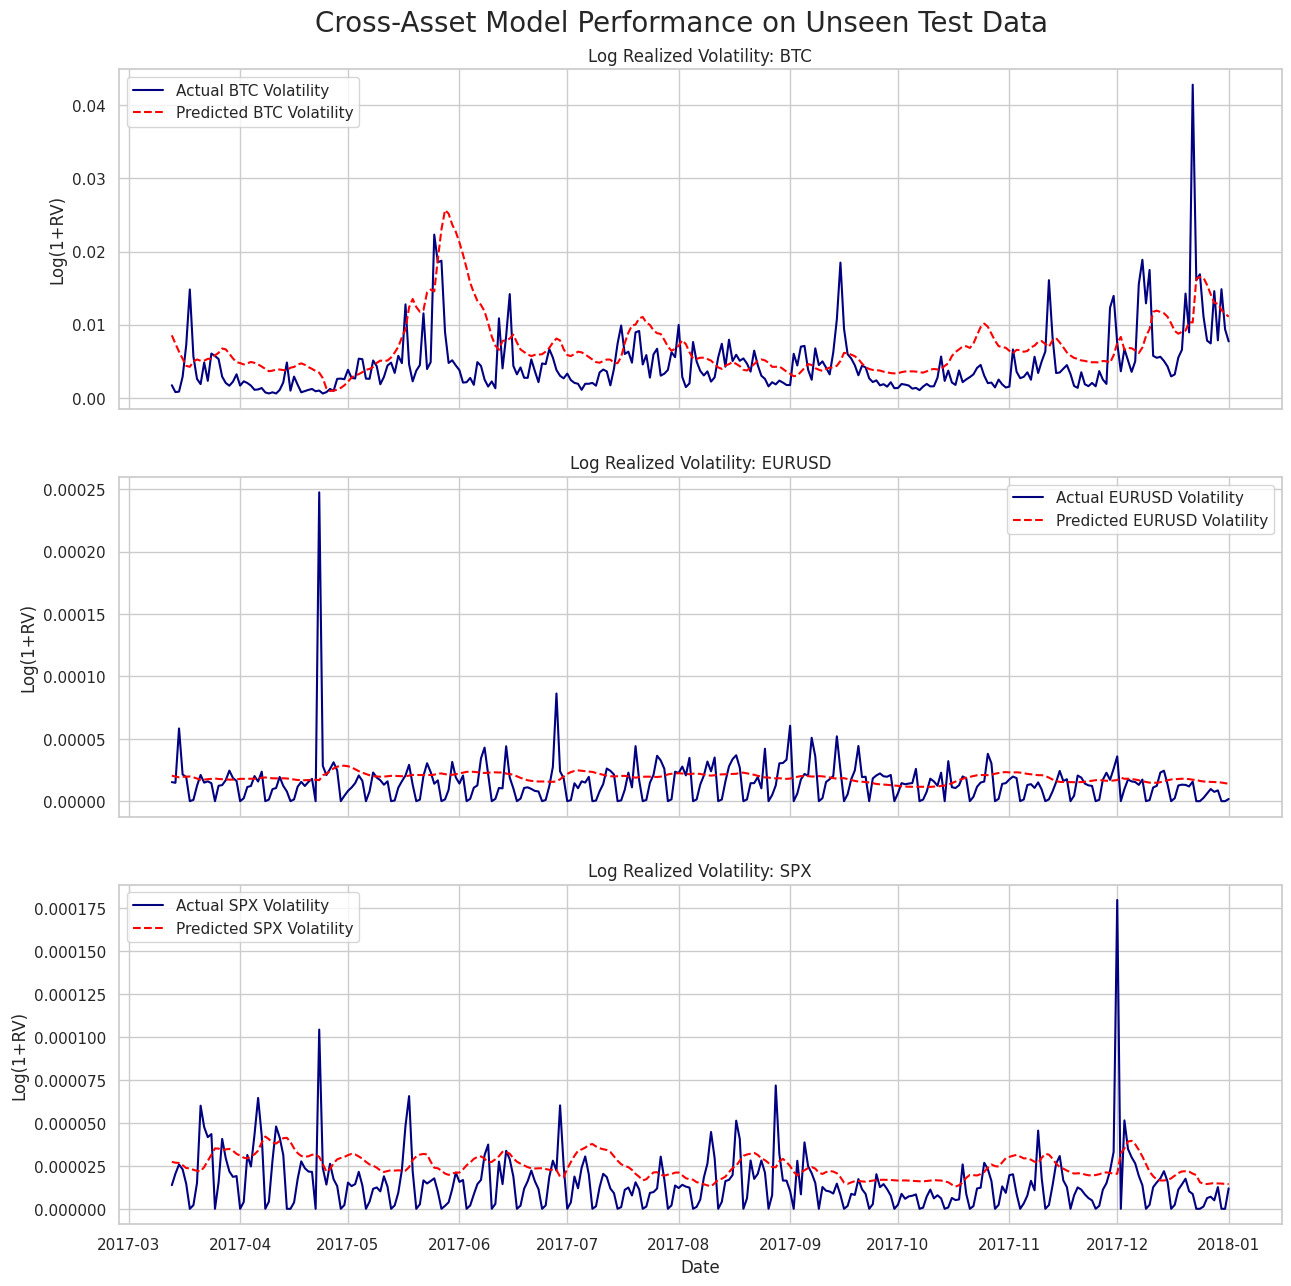


--- Final Performance Metrics (Log-Volatility Scale) ---
  - BTC - Mean Squared Error (MSE): 0.000028
  - EURUSD - Mean Squared Error (MSE): 0.000000
  - SPX - Mean Squared Error (MSE): 0.000000

Project complete. You can now analyze these final results for your report.


In [35]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# We assume the trained 'model', 'test_loader', 'scaler_y', and test data are in memory.

print("--- Starting Final Evaluation on the Test Set for the Cross-Asset Model ---")

# --- Step 1: Make Predictions ---
model.eval()
predictions_list = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        y_pred = model(X_batch)
        predictions_list.append(y_pred.cpu().numpy())

predictions_scaled = np.concatenate(predictions_list, axis=0)
actuals_scaled = y_test_seq[:len(predictions_scaled)]

print("Predictions generated for the entire test set.")

# --- Step 2: Inverse Transform Predictions and Actuals ---
# Use the 'scaler_y' that was fitted on the target variables.
predictions_unscaled = scaler_y.inverse_transform(predictions_scaled)
actuals_unscaled = scaler_y.inverse_transform(actuals_scaled)

print("Predictions and actuals have been inverse-transformed to log-volatility scale.")

# --- Step 3: Create a Results DataFrame ---
results_df = pd.DataFrame(
    actuals_unscaled,
    columns=['Actual_log_btc_rv', 'Actual_log_eurusd_rv', 'Actual_log_spx_rv'],
    index=X_test.index[SEQUENCE_LENGTH:] # Use the correct index from the original test set
)
predictions_df = pd.DataFrame(
    predictions_unscaled,
    columns=['Predicted_log_btc_rv', 'Predicted_log_eurusd_rv', 'Predicted_log_spx_rv'],
    index=results_df.index
)
final_results = pd.concat([results_df, predictions_df], axis=1)


# --- Step 4: Visualize the Results for Each Asset ---
print("\n--- Visualizing Predictions vs. Actuals for Each Asset ---")
assets = ['btc', 'eurusd', 'spx']
fig, axes = plt.subplots(len(assets), 1, figsize=(15, 15), sharex=True)
plt.suptitle('Cross-Asset Model Performance on Unseen Test Data', fontsize=20, y=0.92)

for i, asset in enumerate(assets):
    ax = axes[i]
    ax.plot(final_results.index, final_results[f'Actual_log_{asset}_rv'], label=f'Actual {asset.upper()} Volatility', color='navy')
    ax.plot(final_results.index, final_results[f'Predicted_log_{asset}_rv'], label=f'Predicted {asset.upper()} Volatility', color='red', linestyle='--')
    ax.set_title(f'Log Realized Volatility: {asset.upper()}')
    ax.set_ylabel('Log(1+RV)')
    ax.legend()
    ax.grid(True)

axes[-1].set_xlabel('Date')
plt.show()


# --- Step 5: Calculate and Print Final Error Metrics ---
print("\n--- Final Performance Metrics (Log-Volatility Scale) ---")
for asset in assets:
    mse = mean_squared_error(
        final_results[f'Actual_log_{asset}_rv'],
        final_results[f'Predicted_log_{asset}_rv']
    )
    print(f"  - {asset.upper()} - Mean Squared Error (MSE): {mse:.6f}")

print("\nProject complete. You can now analyze these final results for your report.")

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# --- Step 1: Define the Attention Module ---
# This module will compute the context vector at each time step.

class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_size * 2, hidden_size)
        self.v = nn.Parameter(torch.rand(hidden_size))
        
    def forward(self, lstm_outputs):
        # lstm_outputs shape: (batch_size, seq_length, hidden_size)
        batch_size = lstm_outputs.size(0)
        seq_len = lstm_outputs.size(1)
        
        # We need to calculate the energy score for each time step in the sequence
        # To do this, we'll process the entire sequence at once
        
        # Get the last hidden state of the LSTM to use as the query
        query = lstm_outputs[:, -1, :].unsqueeze(1).repeat(1, seq_len, 1) # (batch_size, seq_len, hidden_size)
        
        # Concatenate query and lstm_outputs (the keys)
        concat_features = torch.cat((query, lstm_outputs), dim=2) # (batch_size, seq_len, hidden_size * 2)
        
        # Calculate energy scores
        energy = torch.tanh(self.attn(concat_features)) # (batch_size, seq_len, hidden_size)
        
        # Calculate attention scores (dot product with parameter v)
        attn_scores = torch.bmm(energy, self.v.unsqueeze(0).unsqueeze(2).repeat(batch_size, 1, 1)).squeeze(2) # (batch_size, seq_len)
        
        # Apply softmax to get the attention weights (probabilities)
        attention_weights = F.softmax(attn_scores, dim=1) # (batch_size, seq_len)
        
        # Calculate the context vector (weighted sum of lstm_outputs)
        context_vector = torch.bmm(lstm_outputs.transpose(1, 2), attention_weights.unsqueeze(2)).squeeze(2) # (batch_size, hidden_size)
        
        return context_vector, attention_weights

print("--- Attention Module Defined ---")

# --- Step 2: Define the Full LSTM-with-Attention Model ---

class LSTMAttentionModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob):
        super(LSTMAttentionModel, self).__init__()
        
        # We use bidirectional=True to capture patterns from both past and future in the sequence
        # This makes the hidden_size for the attention layer hidden_size * 2
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                              batch_first=True, dropout=dropout_prob, bidirectional=True)
        
        # The attention layer takes the concatenated hidden states from both directions
        self.attention = Attention(hidden_size)
        
        # A simple dropout layer
        self.dropout = nn.Dropout(dropout_prob)

        # The final fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # LSTM layer
        # The output `lstm_out` contains the hidden states for each time step from both directions
        lstm_out, _ = self.lstm(x)
        # To make it usable by the attention layer, we sum the hidden states from both directions
        lstm_out = (lstm_out[:, :, :self.lstm.hidden_size] +
                    lstm_out[:, :, self.lstm.hidden_size:])
        
        # Attention layer
        context_vector, attention_weights = self.attention(lstm_out)
        
        # Apply dropout to the context vector before the final prediction
        context_vector = self.dropout(context_vector)
        
        # Final prediction
        return self.fc(context_vector)

print("--- LSTMAttentionModel Defined ---")

--- Attention Module Defined ---
--- LSTMAttentionModel Defined ---


In [37]:
import time
from torch.utils.data import TensorDataset, DataLoader

# We assume all the prepared data (X_train_seq, etc.) and scalers are in memory.

# --- Step 1: Instantiate the New Model ---
# Hyperparameters
INPUT_SIZE = X_train_seq.shape[2]  # Should be 8
HIDDEN_SIZE = 128                  # Neurons in LSTM layer
NUM_LAYERS = 2                     # Number of LSTM layers
OUTPUT_SIZE = y_train_seq.shape[1] # Should be 3
DROPOUT_PROB = 0.3                 # A slightly higher dropout can help with more complex models

# Create the model and move it to the GPU
attention_model = LSTMAttentionModel(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE, DROPOUT_PROB).to(device)

print("--- New LSTMAttentionModel Architecture ---")
print(attention_model)
total_params = sum(p.numel() for p in attention_model.parameters() if p.requires_grad)
print(f"\nTotal trainable parameters: {total_params:,}")

# --- Step 2: Define Loss and Optimizer ---
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(attention_model.parameters(), lr=0.001)

# --- Step 3: Train the Model ---
print("\n--- Starting Training of LSTM with Attention Model ---")

NUM_EPOCHS, patience, best_val_loss, epochs_no_improve = 100, 10, float('inf'), 0
train_losses, val_losses = [], []
start_time = time.time()

for epoch in range(NUM_EPOCHS):
    attention_model.train()
    batch_train_losses = []
    for X, y in train_loader:
        y_pred = attention_model(X)
        loss = loss_function(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_train_losses.append(loss.item())
    
    epoch_train_loss = np.mean(batch_train_losses)
    train_losses.append(epoch_train_loss)

    attention_model.eval()
    batch_val_losses = []
    with torch.no_grad():
        for X, y in val_loader:
            y_pred = attention_model(X)
            loss = loss_function(y_pred, y)
            batch_val_losses.append(loss.item())
    
    epoch_val_loss = np.mean(batch_val_losses)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1:02}/{NUM_EPOCHS} | Train Loss: {epoch_train_loss:.4f} | Val Loss: {epoch_val_loss:.4f}")

    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_no_improve = 0
        torch.save(attention_model.state_dict(), 'best_attention_model.pth')
        print(f"  -> Validation loss improved. Saving model.")
    else:
        epochs_no_improve += 1
    
    if epochs_no_improve >= patience:
        print(f"Early stopping triggered after {patience} epochs.")
        break

end_time = time.time()
print(f"\n--- Training Complete ---")
print(f"Total training time: {end_time - start_time:.2f} seconds")
print(f"Best validation loss: {best_val_loss:.4f}")

# Load the best model for evaluation
attention_model.load_state_dict(torch.load('best_attention_model.pth'))

--- New LSTMAttentionModel Architecture ---
LSTMAttentionModel(
  (lstm): LSTM(8, 128, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)
  (attention): Attention(
    (attn): Linear(in_features=256, out_features=128, bias=True)
  )
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=3, bias=True)
)

Total trainable parameters: 569,987

--- Starting Training of LSTM with Attention Model ---
Epoch 01/100 | Train Loss: 11.6250 | Val Loss: 534.6388
  -> Validation loss improved. Saving model.
Epoch 02/100 | Train Loss: 11.2325 | Val Loss: 536.0039
Epoch 03/100 | Train Loss: 10.6575 | Val Loss: 535.9510
Epoch 04/100 | Train Loss: 10.2256 | Val Loss: 535.8945
Epoch 05/100 | Train Loss: 10.0521 | Val Loss: 535.2931
Epoch 06/100 | Train Loss: 9.6718 | Val Loss: 535.6711
Epoch 07/100 | Train Loss: 9.3199 | Val Loss: 535.3619
Epoch 08/100 | Train Loss: 8.9946 | Val Loss: 535.1040
Epoch 09/100 | Train Loss: 8.8912 | Val Loss: 535.5027
Epoch 10/10

<All keys matched successfully>

Generated predictions from the standard LSTM for comparison.
Generated predictions from the Attention LSTM.
All data has been inverse-transformed to log-volatility scale.

--- Visual Comparison: Standard LSTM vs. Attention LSTM ---


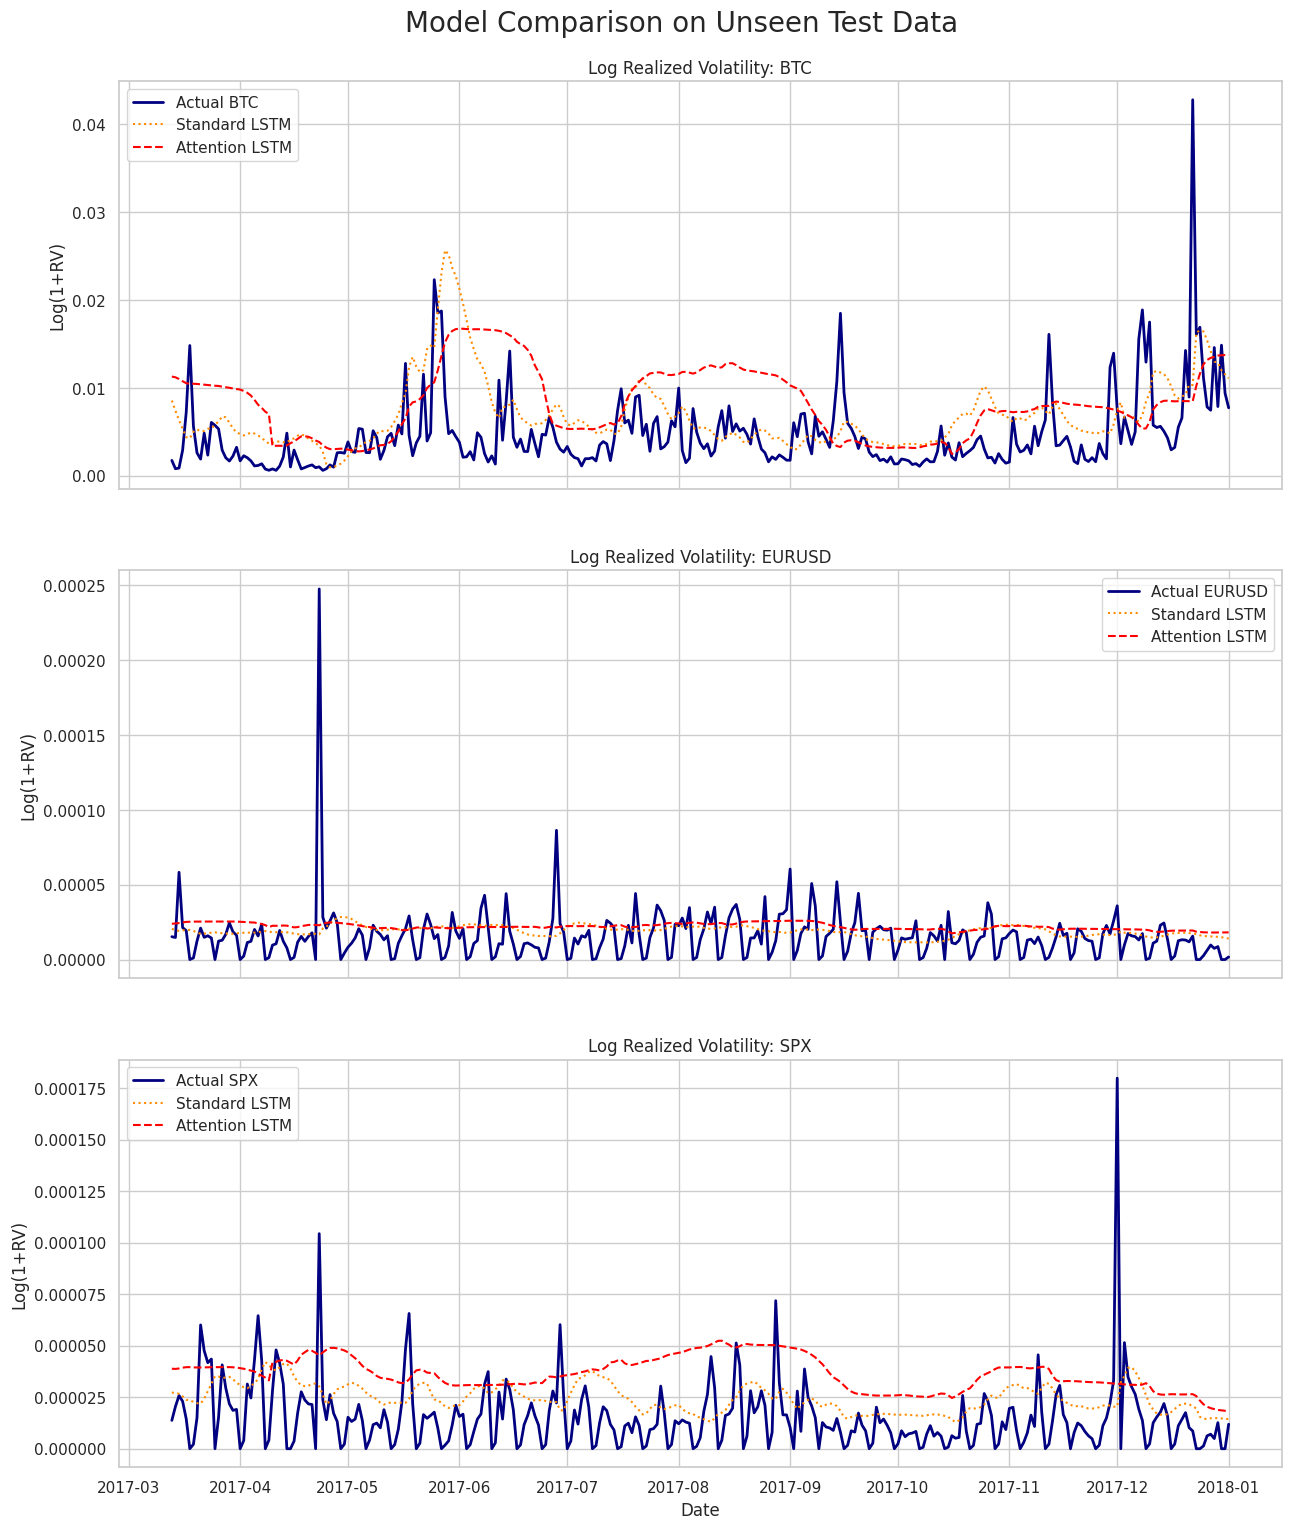


--- Final Performance Metrics Comparison (Log-Volatility Scale) ---

--- BTC ---
  - Attention LSTM MSE: 0.000041
  - Standard LSTM MSE:  0.000028
  -> Improvement: -48.06%

--- EURUSD ---
  - Attention LSTM MSE: 0.000000
  - Standard LSTM MSE:  0.000000
  -> Improvement: -4.16%

--- SPX ---
  - Attention LSTM MSE: 0.000000
  - Standard LSTM MSE:  0.000000
  -> Improvement: -100.83%


In [38]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# --- Step 0: Ensure we have predictions from the standard LSTM for comparison ---
# We need to load the previous model and get its predictions if they aren't in memory.
try:
    # This assumes 'model' is the standard LSTM from the previous run
    model.load_state_dict(torch.load('best_cross_asset_model.pth'))
    model.eval()
    with torch.no_grad():
        standard_preds_scaled = model(X_test_t).cpu().numpy()
    print("Generated predictions from the standard LSTM for comparison.")
except (NameError, FileNotFoundError):
    print("Could not find standard LSTM model. Skipping comparison.")
    standard_preds_scaled = None


# --- Step 1: Make Predictions with the Attention Model ---
attention_model.eval()
with torch.no_grad():
    attention_preds_scaled = attention_model(X_test_t).cpu().numpy()

print("Generated predictions from the Attention LSTM.")


# --- Step 2: Inverse Transform All Data ---
actuals_unscaled = scaler_y.inverse_transform(y_test_seq)
attention_preds_unscaled = scaler_y.inverse_transform(attention_preds_scaled)
if standard_preds_scaled is not None:
    standard_preds_unscaled = scaler_y.inverse_transform(standard_preds_scaled)

print("All data has been inverse-transformed to log-volatility scale.")


# --- Step 3: Create a Comprehensive Results DataFrame ---
# Create the base results DataFrame with actuals
results_df = pd.DataFrame(
    actuals_unscaled,
    columns=['Actual_log_btc_rv', 'Actual_log_eurusd_rv', 'Actual_log_spx_rv'],
    index=X_test.index[SEQUENCE_LENGTH:len(actuals_unscaled) + SEQUENCE_LENGTH]
)

# Add predictions from the Attention model
results_df[['Pred_Attn_log_btc_rv', 'Pred_Attn_log_eurusd_rv', 'Pred_Attn_log_spx_rv']] = attention_preds_unscaled

# Add predictions from the standard model if they exist
if standard_preds_scaled is not None:
    results_df[['Pred_Std_log_btc_rv', 'Pred_Std_log_eurusd_rv', 'Pred_Std_log_spx_rv']] = standard_preds_unscaled


# --- Step 4: Visualize the Comparison for Each Asset ---
print("\n--- Visual Comparison: Standard LSTM vs. Attention LSTM ---")
assets = ['btc', 'eurusd', 'spx']
fig, axes = plt.subplots(len(assets), 1, figsize=(15, 18), sharex=True)
plt.suptitle('Model Comparison on Unseen Test Data', fontsize=20, y=0.92)

for i, asset in enumerate(assets):
    ax = axes[i]
    ax.plot(results_df.index, results_df[f'Actual_log_{asset}_rv'], label=f'Actual {asset.upper()}', color='navy', linewidth=2)
    
    if standard_preds_scaled is not None:
        ax.plot(results_df.index, results_df[f'Pred_Std_log_{asset}_rv'], label=f'Standard LSTM', color='darkorange', linestyle=':')
    
    ax.plot(results_df.index, results_df[f'Pred_Attn_log_{asset}_rv'], label=f'Attention LSTM', color='red', linestyle='--')
    
    ax.set_title(f'Log Realized Volatility: {asset.upper()}')
    ax.set_ylabel('Log(1+RV)')
    ax.legend()
    ax.grid(True)

axes[-1].set_xlabel('Date')
plt.show()


# --- Step 5: Calculate and Compare Final Error Metrics ---
print("\n--- Final Performance Metrics Comparison (Log-Volatility Scale) ---")
for asset in assets:
    print(f"\n--- {asset.upper()} ---")
    mse_attn = mean_squared_error(results_df[f'Actual_log_{asset}_rv'], results_df[f'Pred_Attn_log_{asset}_rv'])
    print(f"  - Attention LSTM MSE: {mse_attn:.6f}")
    
    if standard_preds_scaled is not None:
        mse_std = mean_squared_error(results_df[f'Actual_log_{asset}_rv'], results_df[f'Pred_Std_log_{asset}_rv'])
        print(f"  - Standard LSTM MSE:  {mse_std:.6f}")
        improvement = ((mse_std - mse_attn) / mse_std) * 100 if mse_std > 0 else 0
        print(f"  -> Improvement: {improvement:.2f}%")

In [39]:
import torch
import torch.nn as nn
import time
from torch.utils.data import TensorDataset, DataLoader

# --- Step 1: Redefine the Model for Probabilistic Output ---
# We will use the standard LSTM architecture for simplicity, but modify its output.
# The goal is to prove the concept, which can later be combined with Attention.

class ProbabilisticLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_assets, dropout_prob):
        super(ProbabilisticLSTM, self).__init__()
        
        # The output size is now 2 per asset (mu and sigma)
        output_size = num_assets * 2
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        
        lstm_out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(lstm_out[:, -1, :])
        params = self.fc(out)
        
        # Split the output into mu and sigma for each asset
        # Let's assume the first half are mus, second half are sigmas
        num_assets = params.shape[1] // 2
        mu = params[:, :num_assets]
        
        # Sigma must be positive. We pass it through a softplus function to ensure this.
        sigma = F.softplus(params[:, num_assets:])
        
        # To avoid numerically unstable small sigma values, add a small epsilon
        sigma = sigma + 1e-6
        
        return mu, sigma

# --- Step 2: Define the Negative Log-Likelihood (NLL) Loss Function ---
def nll_loss(y_true, mu, sigma):
    """
    Calculates the negative log-likelihood of the true data given the
    predicted distribution parameters (mu and sigma).
    """
    # Create a Normal distribution object from the predicted parameters
    distribution = torch.distributions.Normal(mu, sigma)
    
    # Calculate the negative log probability of the true values under the distribution
    # We sum over the assets and take the mean over the batch
    return -distribution.log_prob(y_true).sum(axis=-1).mean()


# --- Step 3: Instantiate the new model and prepare for training ---
INPUT_SIZE = X_train_seq.shape[2]
NUM_ASSETS = y_train_seq.shape[1]
prob_model = ProbabilisticLSTM(input_size=INPUT_SIZE, hidden_size=128, num_layers=2, num_assets=NUM_ASSETS, dropout_prob=0.2).to(device)

optimizer = torch.optim.Adam(prob_model.parameters(), lr=0.001)

print("--- Probabilistic Model Architecture ---")
print(prob_model)
print(f"\nModel output will be split into {NUM_ASSETS} mus and {NUM_ASSETS} sigmas.")
print("Using Negative Log-Likelihood loss function.")

# You can now run your training loop using `prob_model` and `nll_loss`
# Example snippet for the training loop:
# for X, y in train_loader:
#     mu, sigma = prob_model(X)
#     loss = nll_loss(y, mu, sigma)
#     optimizer.zero_grad()
#     ... etc ...

--- Probabilistic Model Architecture ---
ProbabilisticLSTM(
  (lstm): LSTM(8, 128, num_layers=2, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=128, out_features=6, bias=True)
)

Model output will be split into 3 mus and 3 sigmas.
Using Negative Log-Likelihood loss function.


In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import time
from torch.utils.data import TensorDataset, DataLoader

# We assume 'prob_model', 'nll_loss', 'optimizer', and the DataLoaders are in memory from the previous cell.

# --- Training Loop for the Probabilistic Model ---
print("\n--- Starting Training of Probabilistic LSTM Model ---")
NUM_EPOCHS, patience, best_val_loss, epochs_no_improve = 100, 10, float('inf'), 0
train_losses, val_losses = [], []
start_time = time.time()

for epoch in range(NUM_EPOCHS):
    
    # --- Training Phase ---
    prob_model.train()
    batch_train_losses = []
    for X, y_true in train_loader:
        # Forward pass: get the distribution parameters
        mu, sigma = prob_model(X)
        
        # Calculate loss using our custom NLL function
        loss = nll_loss(y_true, mu, sigma)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_train_losses.append(loss.item())
        
    epoch_train_loss = np.mean(batch_train_losses)
    train_losses.append(epoch_train_loss)
    
    # --- Validation Phase ---
    prob_model.eval()
    batch_val_losses = []
    with torch.no_grad():
        for X, y_true in val_loader:
            # Forward pass
            mu, sigma = prob_model(X)
            
            # Calculate validation loss
            loss = nll_loss(y_true, mu, sigma)
            batch_val_losses.append(loss.item())
            
    epoch_val_loss = np.mean(batch_val_losses)
    val_losses.append(epoch_val_loss)
    
    # Print progress
    print(f"Epoch {epoch+1:02}/{NUM_EPOCHS} | Train Loss (NLL): {epoch_train_loss:.4f} | Val Loss (NLL): {epoch_val_loss:.4f}")
    
    # --- Early Stopping Logic ---
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_no_improve = 0
        # Save the best model state
        torch.save(prob_model.state_dict(), 'best_probabilistic_model.pth')
        print(f"  -> Validation loss improved. Saving model.")
    else:
        epochs_no_improve += 1
        
    if epochs_no_improve >= patience:
        print(f"Early stopping triggered after {patience} epochs.")
        break

end_time = time.time()
print(f"\n--- Training Complete ---")
print(f"Total training time: {end_time - start_time:.2f} seconds")
print(f"Best validation NLL loss: {best_val_loss:.4f}")

# Load the best model found during training
prob_model.load_state_dict(torch.load('best_probabilistic_model.pth'))


--- Starting Training of Probabilistic LSTM Model ---
Epoch 01/100 | Train Loss (NLL): 29.9842 | Val Loss (NLL): 231.1544
  -> Validation loss improved. Saving model.
Epoch 02/100 | Train Loss (NLL): 6.4704 | Val Loss (NLL): 70.8086
  -> Validation loss improved. Saving model.
Epoch 03/100 | Train Loss (NLL): 6.1796 | Val Loss (NLL): 121.2890
Epoch 04/100 | Train Loss (NLL): 5.5307 | Val Loss (NLL): 219.4454
Epoch 05/100 | Train Loss (NLL): 5.3120 | Val Loss (NLL): 179.3836
Epoch 06/100 | Train Loss (NLL): 5.1051 | Val Loss (NLL): 259.6934
Epoch 07/100 | Train Loss (NLL): 4.9969 | Val Loss (NLL): 460.2825
Epoch 08/100 | Train Loss (NLL): 5.2107 | Val Loss (NLL): 355.1235
Epoch 09/100 | Train Loss (NLL): 4.7429 | Val Loss (NLL): 124.6478
Epoch 10/100 | Train Loss (NLL): 4.6783 | Val Loss (NLL): 194.6542
Epoch 11/100 | Train Loss (NLL): 4.5080 | Val Loss (NLL): 133.4283
Epoch 12/100 | Train Loss (NLL): 4.2794 | Val Loss (NLL): 108.5193
Early stopping triggered after 10 epochs.

--- Trai

<All keys matched successfully>

--- Starting Evaluation of the Probabilistic Model ---
Predicted distribution parameters (mu, sigma) generated for the test set.
Parameters and actuals inverse-transformed to log-volatility scale.

--- Visualizing Probabilistic Forecasts with 95% Confidence Intervals ---


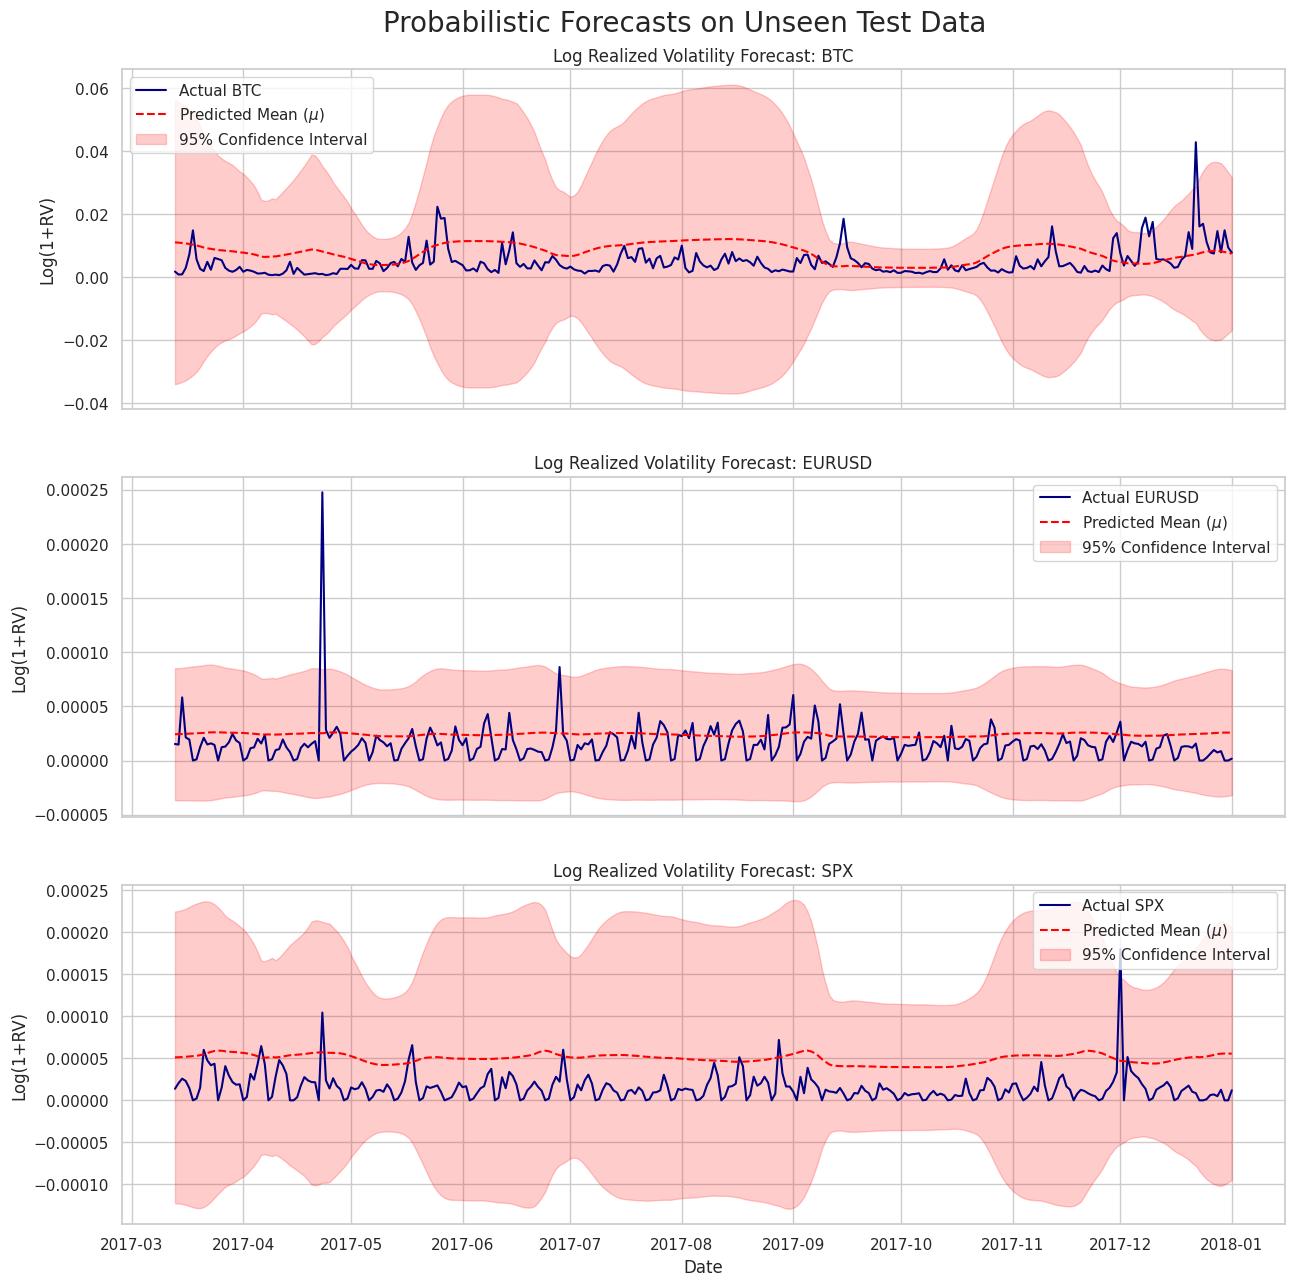


--- 95% Value-at-Risk (VaR) Backtest ---

--- BTC ---
  - Total Observations: 295
  - Expected Breaches at 5.0% VaR: 14.8
  - Actual Breaches: 7
  -> Breach Rate: 2.37% (Expected: 5.00%)
  -> Result: Model is OVERESTIMATING risk.

--- EURUSD ---
  - Total Observations: 295
  - Expected Breaches at 5.0% VaR: 14.8
  - Actual Breaches: 2
  -> Breach Rate: 0.68% (Expected: 5.00%)
  -> Result: Model is OVERESTIMATING risk.

--- SPX ---
  - Total Observations: 295
  - Expected Breaches at 5.0% VaR: 14.8
  - Actual Breaches: 1
  -> Breach Rate: 0.34% (Expected: 5.00%)
  -> Result: Model is OVERESTIMATING risk.


In [41]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# We assume the trained 'prob_model', 'test_loader', scalers, and test data are in memory.

print("--- Starting Evaluation of the Probabilistic Model ---")

# --- Step 1: Get Predictions (mu and sigma) for the Test Set ---
prob_model.eval()
mus_list, sigmas_list = [], []
with torch.no_grad():
    for X_batch, _ in test_loader:
        mu, sigma = prob_model(X_batch)
        mus_list.append(mu.cpu().numpy())
        sigmas_list.append(sigma.cpu().numpy())

# Concatenate all batch predictions
mus_scaled = np.concatenate(mus_list, axis=0)
sigmas_scaled = np.concatenate(sigmas_list, axis=0)
actuals_scaled = y_test_seq[:len(mus_scaled)]

print("Predicted distribution parameters (mu, sigma) generated for the test set.")

# --- Step 2: Inverse Transform to Original Log-Volatility Scale ---
# We need to be careful here. The mean (mu) can be inverse-transformed directly.
# The standard deviation (sigma) is a measure of scale and must be multiplied by the scaler's scale factor.

# Inverse transform the means (locations)
mus_unscaled = scaler_y.inverse_transform(mus_scaled)

# Inverse transform the standard deviations (scales)
# We create a dummy array of zeros with the same shape as sigmas and add our sigmas
# to it, then inverse_transform. The result for the 'zero' part is the location,
# and the result for the 'sigma' part is the scaled sigma. A bit of a hack, but effective.
zeros_with_sigmas = np.zeros_like(sigmas_scaled) + sigmas_scaled
# The scale of the scaler is what matters for the standard deviation
sigmas_unscaled = scaler_y.scale_ * sigmas_scaled

# Get the unscaled actuals for comparison
actuals_unscaled = scaler_y.inverse_transform(actuals_scaled)

print("Parameters and actuals inverse-transformed to log-volatility scale.")


# --- Step 3: Create Results DataFrame and Calculate Confidence Intervals ---
results_df = pd.DataFrame(
    actuals_unscaled,
    columns=['Actual_log_btc_rv', 'Actual_log_eurusd_rv', 'Actual_log_spx_rv'],
    index=X_test.index[SEQUENCE_LENGTH:len(actuals_unscaled) + SEQUENCE_LENGTH]
)

assets = ['btc', 'eurusd', 'spx']
for i, asset in enumerate(assets):
    results_df[f'mu_{asset}'] = mus_unscaled[:, i]
    results_df[f'sigma_{asset}'] = sigmas_unscaled[:, i]
    # Calculate 95% confidence interval
    results_df[f'upper_bound_{asset}'] = results_df[f'mu_{asset}'] + 1.96 * results_df[f'sigma_{asset}']
    results_df[f'lower_bound_{asset}'] = results_df[f'mu_{asset}'] - 1.96 * results_df[f'sigma_{asset}']

    
# --- Step 4: Visualize the Probabilistic Forecasts ---
print("\n--- Visualizing Probabilistic Forecasts with 95% Confidence Intervals ---")
fig, axes = plt.subplots(len(assets), 1, figsize=(15, 15), sharex=True)
plt.suptitle('Probabilistic Forecasts on Unseen Test Data', fontsize=20, y=0.92)

for i, asset in enumerate(assets):
    ax = axes[i]
    # Plot the actual values
    ax.plot(results_df.index, results_df[f'Actual_log_{asset}_rv'], label=f'Actual {asset.upper()}', color='navy')
    # Plot the predicted mean
    ax.plot(results_df.index, results_df[f'mu_{asset}'], label=f'Predicted Mean ($\mu$)', color='red', linestyle='--')
    # Shade the confidence interval
    ax.fill_between(results_df.index, results_df[f'lower_bound_{asset}'], results_df[f'upper_bound_{asset}'], color='red', alpha=0.2, label='95% Confidence Interval')
    
    ax.set_title(f'Log Realized Volatility Forecast: {asset.upper()}')
    ax.set_ylabel('Log(1+RV)')
    ax.legend()
    ax.grid(True)

axes[-1].set_xlabel('Date')
plt.show()


# --- Step 5: VaR Backtest ---
print("\n--- 95% Value-at-Risk (VaR) Backtest ---")
alpha = 0.05 # 95% confidence level

for i, asset in enumerate(assets):
    # The 95% VaR is the 95th percentile of our predicted distribution
    results_df[f'VaR_95_{asset}'] = results_df[f'mu_{asset}'] + norm.ppf(1 - alpha) * results_df[f'sigma_{asset}']
    
    # A "breach" occurs if the actual volatility was higher than our VaR estimate
    results_df[f'breach_{asset}'] = results_df[f'Actual_log_{asset}_rv'] > results_df[f'VaR_95_{asset}']
    
    num_breaches = results_df[f'breach_{asset}'].sum()
    total_days = len(results_df)
    breach_percentage = (num_breaches / total_days) * 100
    expected_percentage = alpha * 100
    
    print(f"\n--- {asset.upper()} ---")
    print(f"  - Total Observations: {total_days}")
    print(f"  - Expected Breaches at {alpha*100:.1f}% VaR: {total_days * alpha:.1f}")
    print(f"  - Actual Breaches: {num_breaches}")
    print(f"  -> Breach Rate: {breach_percentage:.2f}% (Expected: {expected_percentage:.2f}%)")
    if breach_percentage > expected_percentage:
        print("  -> Result: Model is UNDERESTIMATING risk.")
    else:
        print("  -> Result: Model is OVERESTIMATING risk.")